<a href="https://colab.research.google.com/github/iopebiel/machine_learning_fraud_credit_card/blob/randomForest/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Bibliotecas

In [1]:
!pip install imblearn
from sklearn.metrics import roc_auc_score
from kagglehub import KaggleDatasetAdapter
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.combine import SMOTEENN
from cuml.ensemble import RandomForestClassifier as cuRandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, matthews_corrcoef
import pandas as pd
import seaborn as sn
import kagglehub as kh
import matplotlib.pyplot as plt
import os

Download Arquivo CSV no repositório Credit Card Fraud na plataforma Kaggle

In [2]:
path = kh.dataset_download("mlg-ulb/creditcardfraud")

print("Caminho para o Dataset:", path)
os.listdir(path)

Using Colab cache for faster access to the 'creditcardfraud' dataset.
Caminho para o Dataset: /kaggle/input/creditcardfraud


['creditcard.csv']

In [3]:
data = pd.read_csv(path + "/creditcard.csv")
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


## Pré processamento dos dados

In [4]:
number_of_fraud = len(data[data.Class == 1])
number_of_normal= len(data[data.Class == 0])

print ("Fraude:", number_of_fraud)
print ("Legítima:",number_of_normal)

Fraude: 492
Legítima: 284315


In [5]:
X = data.drop("Class", axis=1)
y = data["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
counter = Counter(y_train)
print('Base de dados de treino antes do SMOTE-ENN:', counter)
counter = Counter(y_test)
print('Base de dados de teste', counter)

Base de dados de treino antes do SMOTE-ENN: Counter({0: 199020, 1: 344})
Base de dados de teste Counter({0: 85295, 1: 148})


##SMOTE 50:50

In [6]:
smt = SMOTEENN(random_state=42)
X_train_sm_5050, y_train_sm_5050 = smt.fit_resample(X_train, y_train)
counter = Counter(y_train_sm_5050)
print('Depois do SMOTE-ENN:', counter)

Depois do SMOTE-ENN: Counter({1: 190538, 0: 182347})


##SMOTE 10 : 90

In [7]:
smt = SMOTEENN(random_state=42, sampling_strategy=0.111)
X_train_sm_1090, y_train_sm_1090 = smt.fit_resample(X_train, y_train)
counter = Counter(y_train_sm_1090)
print('Depois do SMOTE-ENN:', counter)

Depois do SMOTE-ENN: Counter({0: 191146, 1: 14770})


#MODELO TREINAMENTO SEM SMOTE

#####**MODELO 1 SCIKIT LEARN PURO**

In [ ]:
model = RandomForestClassifier(n_estimators=10000, verbose=5)

model.fit(X_train,y_train)
y_pred_rl = model.predict(X_train)

print(classification_report(y_train, y_pred_rl))

building tree 1 of 10000
building tree 2 of 10000
building tree 3 of 10000
building tree 4 of 10000
building tree 5 of 10000
building tree 6 of 10000
building tree 7 of 10000
building tree 8 of 10000
building tree 9 of 10000
building tree 10 of 10000
building tree 11 of 10000
building tree 12 of 10000
building tree 13 of 10000
building tree 14 of 10000
building tree 15 of 10000
building tree 16 of 10000
building tree 17 of 10000


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:   25.6s


building tree 18 of 10000
building tree 19 of 10000
building tree 20 of 10000
building tree 21 of 10000
building tree 22 of 10000
building tree 23 of 10000
building tree 24 of 10000
building tree 25 of 10000
building tree 26 of 10000
building tree 27 of 10000
building tree 28 of 10000
building tree 29 of 10000
building tree 30 of 10000
building tree 31 of 10000
building tree 32 of 10000
building tree 33 of 10000
building tree 34 of 10000
building tree 35 of 10000
building tree 36 of 10000
building tree 37 of 10000
building tree 38 of 10000
building tree 39 of 10000
building tree 40 of 10000
building tree 41 of 10000
building tree 42 of 10000
building tree 43 of 10000
building tree 44 of 10000
building tree 45 of 10000
building tree 46 of 10000
building tree 47 of 10000
building tree 48 of 10000
building tree 49 of 10000
building tree 50 of 10000
building tree 51 of 10000
building tree 52 of 10000
building tree 53 of 10000
building tree 54 of 10000
building tree 55 of 10000
building tre

[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:  1.8min


building tree 72 of 10000
building tree 73 of 10000
building tree 74 of 10000
building tree 75 of 10000
building tree 76 of 10000
building tree 77 of 10000
building tree 78 of 10000
building tree 79 of 10000
building tree 80 of 10000
building tree 81 of 10000
building tree 82 of 10000
building tree 83 of 10000
building tree 84 of 10000
building tree 85 of 10000
building tree 86 of 10000
building tree 87 of 10000
building tree 88 of 10000
building tree 89 of 10000
building tree 90 of 10000
building tree 91 of 10000
building tree 92 of 10000
building tree 93 of 10000
building tree 94 of 10000
building tree 95 of 10000
building tree 96 of 10000
building tree 97 of 10000
building tree 98 of 10000
building tree 99 of 10000
building tree 100 of 10000
building tree 101 of 10000
building tree 102 of 10000
building tree 103 of 10000
building tree 104 of 10000
building tree 105 of 10000
building tree 106 of 10000
building tree 107 of 10000
building tree 108 of 10000
building tree 109 of 10000
bu

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:  4.0min


building tree 162 of 10000
building tree 163 of 10000
building tree 164 of 10000
building tree 165 of 10000
building tree 166 of 10000
building tree 167 of 10000
building tree 168 of 10000
building tree 169 of 10000
building tree 170 of 10000
building tree 171 of 10000
building tree 172 of 10000
building tree 173 of 10000
building tree 174 of 10000
building tree 175 of 10000
building tree 176 of 10000
building tree 177 of 10000
building tree 178 of 10000
building tree 179 of 10000
building tree 180 of 10000
building tree 181 of 10000
building tree 182 of 10000
building tree 183 of 10000
building tree 184 of 10000
building tree 185 of 10000
building tree 186 of 10000
building tree 187 of 10000
building tree 188 of 10000
building tree 189 of 10000
building tree 190 of 10000
building tree 191 of 10000
building tree 192 of 10000
building tree 193 of 10000
building tree 194 of 10000
building tree 195 of 10000
building tree 196 of 10000
building tree 197 of 10000
building tree 198 of 10000
b

[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:  7.1min


building tree 288 of 10000
building tree 289 of 10000
building tree 290 of 10000
building tree 291 of 10000
building tree 292 of 10000
building tree 293 of 10000
building tree 294 of 10000
building tree 295 of 10000
building tree 296 of 10000
building tree 297 of 10000
building tree 298 of 10000
building tree 299 of 10000
building tree 300 of 10000
building tree 301 of 10000
building tree 302 of 10000
building tree 303 of 10000
building tree 304 of 10000
building tree 305 of 10000
building tree 306 of 10000
building tree 307 of 10000
building tree 308 of 10000
building tree 309 of 10000
building tree 310 of 10000
building tree 311 of 10000
building tree 312 of 10000
building tree 313 of 10000
building tree 314 of 10000
building tree 315 of 10000
building tree 316 of 10000
building tree 317 of 10000
building tree 318 of 10000
building tree 319 of 10000
building tree 320 of 10000
building tree 321 of 10000
building tree 322 of 10000
building tree 323 of 10000
building tree 324 of 10000
b

[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed: 11.0min


building tree 450 of 10000
building tree 451 of 10000
building tree 452 of 10000
building tree 453 of 10000
building tree 454 of 10000
building tree 455 of 10000
building tree 456 of 10000
building tree 457 of 10000
building tree 458 of 10000
building tree 459 of 10000
building tree 460 of 10000
building tree 461 of 10000
building tree 462 of 10000
building tree 463 of 10000
building tree 464 of 10000
building tree 465 of 10000
building tree 466 of 10000
building tree 467 of 10000
building tree 468 of 10000
building tree 469 of 10000
building tree 470 of 10000
building tree 471 of 10000
building tree 472 of 10000
building tree 473 of 10000
building tree 474 of 10000
building tree 475 of 10000
building tree 476 of 10000
building tree 477 of 10000
building tree 478 of 10000
building tree 479 of 10000
building tree 480 of 10000
building tree 481 of 10000
building tree 482 of 10000
building tree 483 of 10000
building tree 484 of 10000
building tree 485 of 10000
building tree 486 of 10000
b

[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed: 15.9min


building tree 648 of 10000
building tree 649 of 10000
building tree 650 of 10000
building tree 651 of 10000
building tree 652 of 10000
building tree 653 of 10000
building tree 654 of 10000
building tree 655 of 10000
building tree 656 of 10000
building tree 657 of 10000
building tree 658 of 10000
building tree 659 of 10000
building tree 660 of 10000
building tree 661 of 10000
building tree 662 of 10000
building tree 663 of 10000
building tree 664 of 10000
building tree 665 of 10000
building tree 666 of 10000
building tree 667 of 10000
building tree 668 of 10000
building tree 669 of 10000
building tree 670 of 10000
building tree 671 of 10000
building tree 672 of 10000
building tree 673 of 10000
building tree 674 of 10000
building tree 675 of 10000
building tree 676 of 10000
building tree 677 of 10000
building tree 678 of 10000
building tree 679 of 10000
building tree 680 of 10000
building tree 681 of 10000
building tree 682 of 10000
building tree 683 of 10000
building tree 684 of 10000
b

[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed: 21.6min


building tree 882 of 10000
building tree 883 of 10000
building tree 884 of 10000
building tree 885 of 10000
building tree 886 of 10000
building tree 887 of 10000
building tree 888 of 10000
building tree 889 of 10000
building tree 890 of 10000
building tree 891 of 10000
building tree 892 of 10000
building tree 893 of 10000
building tree 894 of 10000
building tree 895 of 10000
building tree 896 of 10000
building tree 897 of 10000
building tree 898 of 10000
building tree 899 of 10000
building tree 900 of 10000
building tree 901 of 10000
building tree 902 of 10000
building tree 903 of 10000
building tree 904 of 10000
building tree 905 of 10000
building tree 906 of 10000
building tree 907 of 10000
building tree 908 of 10000
building tree 909 of 10000
building tree 910 of 10000
building tree 911 of 10000
building tree 912 of 10000
building tree 913 of 10000
building tree 914 of 10000
building tree 915 of 10000
building tree 916 of 10000
building tree 917 of 10000
building tree 918 of 10000
b

[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed: 28.2min


building tree 1152 of 10000
building tree 1153 of 10000
building tree 1154 of 10000
building tree 1155 of 10000
building tree 1156 of 10000
building tree 1157 of 10000
building tree 1158 of 10000
building tree 1159 of 10000
building tree 1160 of 10000
building tree 1161 of 10000
building tree 1162 of 10000
building tree 1163 of 10000
building tree 1164 of 10000
building tree 1165 of 10000
building tree 1166 of 10000
building tree 1167 of 10000
building tree 1168 of 10000
building tree 1169 of 10000
building tree 1170 of 10000
building tree 1171 of 10000
building tree 1172 of 10000
building tree 1173 of 10000
building tree 1174 of 10000
building tree 1175 of 10000
building tree 1176 of 10000
building tree 1177 of 10000
building tree 1178 of 10000
building tree 1179 of 10000
building tree 1180 of 10000
building tree 1181 of 10000
building tree 1182 of 10000
building tree 1183 of 10000
building tree 1184 of 10000
building tree 1185 of 10000
building tree 1186 of 10000
building tree 1187 o

[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed: 35.7min


building tree 1458 of 10000
building tree 1459 of 10000
building tree 1460 of 10000
building tree 1461 of 10000
building tree 1462 of 10000
building tree 1463 of 10000
building tree 1464 of 10000
building tree 1465 of 10000
building tree 1466 of 10000
building tree 1467 of 10000
building tree 1468 of 10000
building tree 1469 of 10000
building tree 1470 of 10000
building tree 1471 of 10000
building tree 1472 of 10000
building tree 1473 of 10000
building tree 1474 of 10000
building tree 1475 of 10000
building tree 1476 of 10000
building tree 1477 of 10000
building tree 1478 of 10000
building tree 1479 of 10000
building tree 1480 of 10000
building tree 1481 of 10000
building tree 1482 of 10000
building tree 1483 of 10000
building tree 1484 of 10000
building tree 1485 of 10000
building tree 1486 of 10000
building tree 1487 of 10000
building tree 1488 of 10000
building tree 1489 of 10000
building tree 1490 of 10000
building tree 1491 of 10000
building tree 1492 of 10000
building tree 1493 o

[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed: 44.2min


building tree 1800 of 10000
building tree 1801 of 10000
building tree 1802 of 10000
building tree 1803 of 10000
building tree 1804 of 10000
building tree 1805 of 10000
building tree 1806 of 10000
building tree 1807 of 10000
building tree 1808 of 10000
building tree 1809 of 10000
building tree 1810 of 10000
building tree 1811 of 10000
building tree 1812 of 10000
building tree 1813 of 10000
building tree 1814 of 10000
building tree 1815 of 10000
building tree 1816 of 10000
building tree 1817 of 10000
building tree 1818 of 10000
building tree 1819 of 10000
building tree 1820 of 10000
building tree 1821 of 10000
building tree 1822 of 10000
building tree 1823 of 10000
building tree 1824 of 10000
building tree 1825 of 10000
building tree 1826 of 10000
building tree 1827 of 10000
building tree 1828 of 10000
building tree 1829 of 10000
building tree 1830 of 10000
building tree 1831 of 10000
building tree 1832 of 10000
building tree 1833 of 10000
building tree 1834 of 10000
building tree 1835 o

[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed: 53.5min


building tree 2178 of 10000
building tree 2179 of 10000
building tree 2180 of 10000
building tree 2181 of 10000
building tree 2182 of 10000
building tree 2183 of 10000
building tree 2184 of 10000
building tree 2185 of 10000
building tree 2186 of 10000
building tree 2187 of 10000
building tree 2188 of 10000
building tree 2189 of 10000
building tree 2190 of 10000
building tree 2191 of 10000
building tree 2192 of 10000
building tree 2193 of 10000
building tree 2194 of 10000
building tree 2195 of 10000
building tree 2196 of 10000
building tree 2197 of 10000
building tree 2198 of 10000
building tree 2199 of 10000
building tree 2200 of 10000
building tree 2201 of 10000
building tree 2202 of 10000
building tree 2203 of 10000
building tree 2204 of 10000
building tree 2205 of 10000
building tree 2206 of 10000
building tree 2207 of 10000
building tree 2208 of 10000
building tree 2209 of 10000
building tree 2210 of 10000
building tree 2211 of 10000
building tree 2212 of 10000
building tree 2213 o

[Parallel(n_jobs=1)]: Done 2591 tasks      | elapsed: 63.8min


building tree 2592 of 10000
building tree 2593 of 10000
building tree 2594 of 10000
building tree 2595 of 10000
building tree 2596 of 10000
building tree 2597 of 10000
building tree 2598 of 10000
building tree 2599 of 10000
building tree 2600 of 10000
building tree 2601 of 10000
building tree 2602 of 10000
building tree 2603 of 10000
building tree 2604 of 10000
building tree 2605 of 10000
building tree 2606 of 10000
building tree 2607 of 10000
building tree 2608 of 10000
building tree 2609 of 10000
building tree 2610 of 10000
building tree 2611 of 10000
building tree 2612 of 10000
building tree 2613 of 10000
building tree 2614 of 10000
building tree 2615 of 10000
building tree 2616 of 10000
building tree 2617 of 10000
building tree 2618 of 10000
building tree 2619 of 10000
building tree 2620 of 10000
building tree 2621 of 10000
building tree 2622 of 10000
building tree 2623 of 10000
building tree 2624 of 10000
building tree 2625 of 10000
building tree 2626 of 10000
building tree 2627 o

[Parallel(n_jobs=1)]: Done 3041 tasks      | elapsed: 74.7min


building tree 3042 of 10000
building tree 3043 of 10000
building tree 3044 of 10000
building tree 3045 of 10000
building tree 3046 of 10000
building tree 3047 of 10000
building tree 3048 of 10000
building tree 3049 of 10000
building tree 3050 of 10000
building tree 3051 of 10000
building tree 3052 of 10000
building tree 3053 of 10000
building tree 3054 of 10000
building tree 3055 of 10000
building tree 3056 of 10000
building tree 3057 of 10000
building tree 3058 of 10000
building tree 3059 of 10000
building tree 3060 of 10000
building tree 3061 of 10000
building tree 3062 of 10000
building tree 3063 of 10000
building tree 3064 of 10000
building tree 3065 of 10000
building tree 3066 of 10000
building tree 3067 of 10000
building tree 3068 of 10000
building tree 3069 of 10000
building tree 3070 of 10000
building tree 3071 of 10000
building tree 3072 of 10000
building tree 3073 of 10000
building tree 3074 of 10000
building tree 3075 of 10000
building tree 3076 of 10000
building tree 3077 o

[Parallel(n_jobs=1)]: Done 3527 tasks      | elapsed: 86.5min


building tree 3528 of 10000
building tree 3529 of 10000
building tree 3530 of 10000
building tree 3531 of 10000
building tree 3532 of 10000
building tree 3533 of 10000
building tree 3534 of 10000
building tree 3535 of 10000
building tree 3536 of 10000
building tree 3537 of 10000
building tree 3538 of 10000
building tree 3539 of 10000
building tree 3540 of 10000
building tree 3541 of 10000
building tree 3542 of 10000
building tree 3543 of 10000
building tree 3544 of 10000
building tree 3545 of 10000
building tree 3546 of 10000
building tree 3547 of 10000
building tree 3548 of 10000
building tree 3549 of 10000
building tree 3550 of 10000
building tree 3551 of 10000
building tree 3552 of 10000
building tree 3553 of 10000
building tree 3554 of 10000
building tree 3555 of 10000
building tree 3556 of 10000
building tree 3557 of 10000
building tree 3558 of 10000
building tree 3559 of 10000
building tree 3560 of 10000
building tree 3561 of 10000
building tree 3562 of 10000
building tree 3563 o

[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed: 99.6min


building tree 4050 of 10000
building tree 4051 of 10000
building tree 4052 of 10000
building tree 4053 of 10000
building tree 4054 of 10000
building tree 4055 of 10000
building tree 4056 of 10000
building tree 4057 of 10000
building tree 4058 of 10000
building tree 4059 of 10000
building tree 4060 of 10000
building tree 4061 of 10000
building tree 4062 of 10000
building tree 4063 of 10000
building tree 4064 of 10000
building tree 4065 of 10000
building tree 4066 of 10000
building tree 4067 of 10000
building tree 4068 of 10000
building tree 4069 of 10000
building tree 4070 of 10000
building tree 4071 of 10000
building tree 4072 of 10000
building tree 4073 of 10000
building tree 4074 of 10000
building tree 4075 of 10000
building tree 4076 of 10000
building tree 4077 of 10000
building tree 4078 of 10000
building tree 4079 of 10000
building tree 4080 of 10000
building tree 4081 of 10000
building tree 4082 of 10000
building tree 4083 of 10000
building tree 4084 of 10000
building tree 4085 o

[Parallel(n_jobs=1)]: Done 4607 tasks      | elapsed: 113.6min


building tree 4608 of 10000
building tree 4609 of 10000
building tree 4610 of 10000
building tree 4611 of 10000
building tree 4612 of 10000
building tree 4613 of 10000
building tree 4614 of 10000
building tree 4615 of 10000
building tree 4616 of 10000
building tree 4617 of 10000
building tree 4618 of 10000
building tree 4619 of 10000
building tree 4620 of 10000
building tree 4621 of 10000
building tree 4622 of 10000
building tree 4623 of 10000
building tree 4624 of 10000
building tree 4625 of 10000
building tree 4626 of 10000
building tree 4627 of 10000
building tree 4628 of 10000
building tree 4629 of 10000
building tree 4630 of 10000
building tree 4631 of 10000
building tree 4632 of 10000
building tree 4633 of 10000
building tree 4634 of 10000
building tree 4635 of 10000
building tree 4636 of 10000
building tree 4637 of 10000
building tree 4638 of 10000
building tree 4639 of 10000
building tree 4640 of 10000
building tree 4641 of 10000
building tree 4642 of 10000
building tree 4643 o

[Parallel(n_jobs=1)]: Done 5201 tasks      | elapsed: 128.1min


building tree 5202 of 10000
building tree 5203 of 10000
building tree 5204 of 10000
building tree 5205 of 10000
building tree 5206 of 10000
building tree 5207 of 10000
building tree 5208 of 10000
building tree 5209 of 10000
building tree 5210 of 10000
building tree 5211 of 10000
building tree 5212 of 10000
building tree 5213 of 10000
building tree 5214 of 10000
building tree 5215 of 10000
building tree 5216 of 10000
building tree 5217 of 10000
building tree 5218 of 10000
building tree 5219 of 10000
building tree 5220 of 10000
building tree 5221 of 10000
building tree 5222 of 10000
building tree 5223 of 10000
building tree 5224 of 10000
building tree 5225 of 10000
building tree 5226 of 10000
building tree 5227 of 10000
building tree 5228 of 10000
building tree 5229 of 10000
building tree 5230 of 10000
building tree 5231 of 10000
building tree 5232 of 10000
building tree 5233 of 10000
building tree 5234 of 10000
building tree 5235 of 10000
building tree 5236 of 10000
building tree 5237 o

[Parallel(n_jobs=1)]: Done 5831 tasks      | elapsed: 143.3min


building tree 5832 of 10000
building tree 5833 of 10000
building tree 5834 of 10000
building tree 5835 of 10000
building tree 5836 of 10000
building tree 5837 of 10000
building tree 5838 of 10000
building tree 5839 of 10000
building tree 5840 of 10000
building tree 5841 of 10000
building tree 5842 of 10000
building tree 5843 of 10000
building tree 5844 of 10000
building tree 5845 of 10000
building tree 5846 of 10000
building tree 5847 of 10000
building tree 5848 of 10000
building tree 5849 of 10000
building tree 5850 of 10000
building tree 5851 of 10000
building tree 5852 of 10000
building tree 5853 of 10000
building tree 5854 of 10000
building tree 5855 of 10000
building tree 5856 of 10000
building tree 5857 of 10000
building tree 5858 of 10000
building tree 5859 of 10000
building tree 5860 of 10000
building tree 5861 of 10000
building tree 5862 of 10000
building tree 5863 of 10000
building tree 5864 of 10000
building tree 5865 of 10000
building tree 5866 of 10000
building tree 5867 o

[Parallel(n_jobs=1)]: Done 6497 tasks      | elapsed: 160.0min


building tree 6498 of 10000
building tree 6499 of 10000
building tree 6500 of 10000
building tree 6501 of 10000
building tree 6502 of 10000
building tree 6503 of 10000
building tree 6504 of 10000
building tree 6505 of 10000
building tree 6506 of 10000
building tree 6507 of 10000
building tree 6508 of 10000
building tree 6509 of 10000
building tree 6510 of 10000
building tree 6511 of 10000
building tree 6512 of 10000
building tree 6513 of 10000
building tree 6514 of 10000
building tree 6515 of 10000
building tree 6516 of 10000
building tree 6517 of 10000
building tree 6518 of 10000
building tree 6519 of 10000
building tree 6520 of 10000
building tree 6521 of 10000
building tree 6522 of 10000
building tree 6523 of 10000
building tree 6524 of 10000
building tree 6525 of 10000
building tree 6526 of 10000
building tree 6527 of 10000
building tree 6528 of 10000
building tree 6529 of 10000
building tree 6530 of 10000
building tree 6531 of 10000
building tree 6532 of 10000
building tree 6533 o

[Parallel(n_jobs=1)]: Done 7199 tasks      | elapsed: 177.9min


building tree 7200 of 10000
building tree 7201 of 10000
building tree 7202 of 10000
building tree 7203 of 10000
building tree 7204 of 10000
building tree 7205 of 10000
building tree 7206 of 10000
building tree 7207 of 10000
building tree 7208 of 10000
building tree 7209 of 10000
building tree 7210 of 10000
building tree 7211 of 10000
building tree 7212 of 10000
building tree 7213 of 10000
building tree 7214 of 10000
building tree 7215 of 10000
building tree 7216 of 10000
building tree 7217 of 10000
building tree 7218 of 10000
building tree 7219 of 10000
building tree 7220 of 10000
building tree 7221 of 10000
building tree 7222 of 10000
building tree 7223 of 10000
building tree 7224 of 10000
building tree 7225 of 10000
building tree 7226 of 10000
building tree 7227 of 10000
building tree 7228 of 10000
building tree 7229 of 10000
building tree 7230 of 10000
building tree 7231 of 10000
building tree 7232 of 10000
building tree 7233 of 10000
building tree 7234 of 10000
building tree 7235 o

[Parallel(n_jobs=1)]: Done 7937 tasks      | elapsed: 196.3min


building tree 7938 of 10000
building tree 7939 of 10000
building tree 7940 of 10000
building tree 7941 of 10000
building tree 7942 of 10000
building tree 7943 of 10000
building tree 7944 of 10000
building tree 7945 of 10000
building tree 7946 of 10000
building tree 7947 of 10000
building tree 7948 of 10000
building tree 7949 of 10000
building tree 7950 of 10000
building tree 7951 of 10000
building tree 7952 of 10000
building tree 7953 of 10000
building tree 7954 of 10000
building tree 7955 of 10000
building tree 7956 of 10000
building tree 7957 of 10000
building tree 7958 of 10000
building tree 7959 of 10000
building tree 7960 of 10000
building tree 7961 of 10000
building tree 7962 of 10000
building tree 7963 of 10000
building tree 7964 of 10000
building tree 7965 of 10000
building tree 7966 of 10000
building tree 7967 of 10000
building tree 7968 of 10000
building tree 7969 of 10000
building tree 7970 of 10000
building tree 7971 of 10000
building tree 7972 of 10000
building tree 7973 o

[Parallel(n_jobs=1)]: Done 8711 tasks      | elapsed: 215.7min


building tree 8712 of 10000
building tree 8713 of 10000
building tree 8714 of 10000
building tree 8715 of 10000
building tree 8716 of 10000
building tree 8717 of 10000
building tree 8718 of 10000
building tree 8719 of 10000
building tree 8720 of 10000
building tree 8721 of 10000
building tree 8722 of 10000
building tree 8723 of 10000
building tree 8724 of 10000
building tree 8725 of 10000
building tree 8726 of 10000
building tree 8727 of 10000
building tree 8728 of 10000
building tree 8729 of 10000
building tree 8730 of 10000
building tree 8731 of 10000
building tree 8732 of 10000
building tree 8733 of 10000
building tree 8734 of 10000
building tree 8735 of 10000
building tree 8736 of 10000
building tree 8737 of 10000
building tree 8738 of 10000
building tree 8739 of 10000
building tree 8740 of 10000
building tree 8741 of 10000
building tree 8742 of 10000
building tree 8743 of 10000
building tree 8744 of 10000
building tree 8745 of 10000
building tree 8746 of 10000
building tree 8747 o

[Parallel(n_jobs=1)]: Done 9521 tasks      | elapsed: 235.6min


building tree 9522 of 10000
building tree 9523 of 10000
building tree 9524 of 10000
building tree 9525 of 10000
building tree 9526 of 10000
building tree 9527 of 10000
building tree 9528 of 10000
building tree 9529 of 10000
building tree 9530 of 10000
building tree 9531 of 10000
building tree 9532 of 10000
building tree 9533 of 10000
building tree 9534 of 10000
building tree 9535 of 10000
building tree 9536 of 10000
building tree 9537 of 10000
building tree 9538 of 10000
building tree 9539 of 10000
building tree 9540 of 10000
building tree 9541 of 10000
building tree 9542 of 10000
building tree 9543 of 10000
building tree 9544 of 10000
building tree 9545 of 10000
building tree 9546 of 10000
building tree 9547 of 10000
building tree 9548 of 10000
building tree 9549 of 10000
building tree 9550 of 10000
building tree 9551 of 10000
building tree 9552 of 10000
building tree 9553 of 10000
building tree 9554 of 10000
building tree 9555 of 10000
building tree 9556 of 10000
building tree 9557 o

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    5.8s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    7.9s
[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed:   10.4s
[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed:   13.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:   16.2s
[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed:   19.7s
[Parallel(n_jobs=1)]: Done 2591 tasks      | elapsed:   23.4s
[Parallel(n_jobs=1)]: Done 3041 tasks      | elapsed:   27.4s
[Parallel(n_jobs=1)]: Done 3527 tasks      | elapsed:   31.8s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:   36.4s
[Parallel(n_jobs=1)]: Done 4607 tasks      | elapsed:   41.4s
[Parallel(n_job

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00       344

    accuracy                           1.00    199364
   macro avg       1.00      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364



In [ ]:
print(X_test)
resultado_rl = model.predict(X_test)

            Time        V1        V2        V3        V4        V5        V6  \
186882  127294.0 -2.537331  1.890864 -0.840555 -1.102759 -2.105725  0.367811   
165754  117632.0 -0.250839  1.104108  0.206089  0.417324  1.204079 -0.350694   
235285  148330.0  0.568980 -2.520416 -1.114138  1.670652 -1.128945  0.398822   
101271   67778.0  1.328892  0.226908 -0.308968  0.381772  0.238490 -0.282946   
5832      6308.0  1.124863 -0.165691  1.337053  1.030033 -0.891116  0.202926   
...          ...       ...       ...       ...       ...       ...       ...   
64725    51279.0 -1.808185  1.328808 -0.991449 -2.473986  2.185095  3.496806   
16688    28048.0 -0.442905  0.716727  1.256775  0.860048  1.210872  1.066390   
183868  125990.0  2.092418 -0.931315 -1.553089 -1.131369 -0.197801 -0.373117   
45011    42168.0  1.293234  0.097565 -0.209304  0.329036  0.034958 -0.145507   
150527   93609.0  2.214016 -0.584030 -1.238673 -0.702993 -0.184492 -0.646248   

              V7        V8        V9  .

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed:    4.4s
[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed:    5.5s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    6.8s
[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed:    8.2s
[Parallel(n_jobs=1)]: Done 2591 tasks      | elapsed:    9.8s
[Parallel(n_jobs=1)]: Done 3041 tasks      | elapsed:   11.5s
[Parallel(n_jobs=1)]: Done 3527 tasks      | elapsed:   13.3s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:   15.3s
[Parallel(n_jobs=1)]: Done 4607 tasks      | elapsed:   17.4s
[Parallel(n_job


MÉTRICAS TREINAMENTO
 
SEM SMOTE



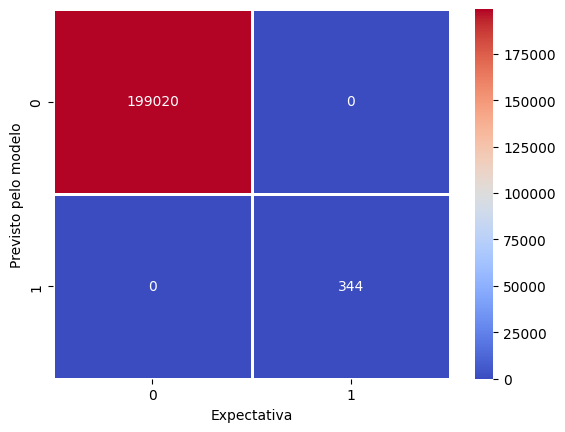

Acurácia: 100.000000%
Precisão: 100.000000%
Recall:  100.000000%
F1 Score:  100.000000%
MCC:  1.0

MÉTRICAS TESTE
 
SEM SMOTE



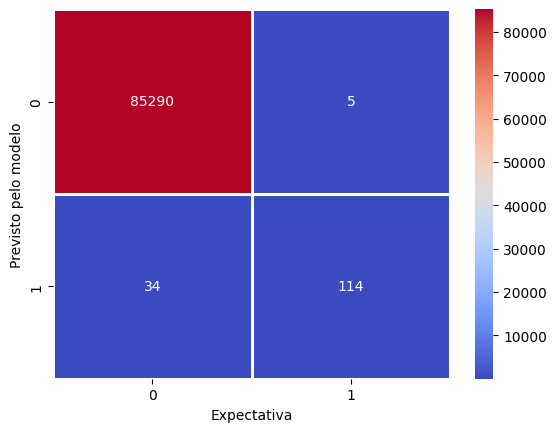

Acurácia: 99.954356%
Precisão: 95.798319%
Recall:  77.027027%
F1 Score:  85.393258%
MCC:  0.8588031796473411

MÉTRICA AUC ROC

Treinamento:  1.0 
Teste: 0.8851058250935148


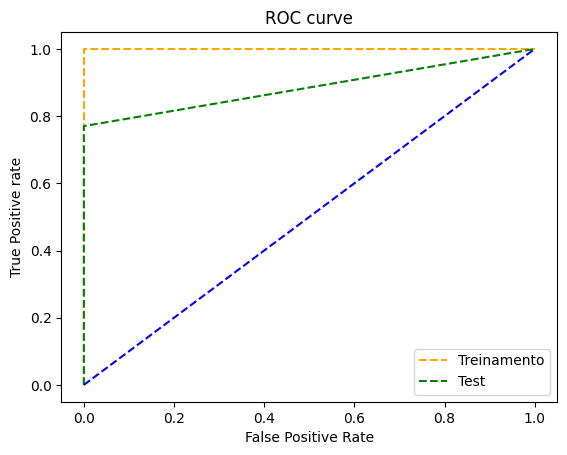

In [ ]:
cf_matrix = confusion_matrix(y_train, y_pred_rl)
sn.heatmap(cf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Expectativa')
plt.ylabel('Previsto pelo modelo')
print("\nMÉTRICAS TREINAMENTO\n \nSEM SMOTE\n")
plt.show()
print(f'Acurácia: {accuracy_score(y_train, y_pred_rl):%}')
print(f'Precisão: {precision_score(y_train, y_pred_rl):%}')
print(f'Recall:  {recall_score(y_train, y_pred_rl):%}')
print(f'F1 Score:  {f1_score(y_train, y_pred_rl):%}')
print(f'MCC:  {matthews_corrcoef(y_train, y_pred_rl)}')
cf_matrix = confusion_matrix(y_test, resultado_rl)
sn.heatmap(cf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Expectativa')
plt.ylabel('Previsto pelo modelo')
print("\nMÉTRICAS TESTE\n \nSEM SMOTE\n")
plt.show()
print(f'Acurácia: {accuracy_score(y_test, resultado_rl):%}')
print(f'Precisão: {precision_score(y_test, resultado_rl):%}')
print(f'Recall:  {recall_score(y_test, resultado_rl):%}')
print(f'F1 Score:  {f1_score(y_test, resultado_rl):%}')
print(f'MCC:  {matthews_corrcoef(y_test, resultado_rl)}')


print("\nMÉTRICA AUC ROC\n")
fpr1, tpr1, thresh1 = roc_curve(y_train, y_pred_rl, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, resultado_rl, pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

auc_score1 = roc_auc_score(y_train, y_pred_rl)
auc_score2 = roc_auc_score(y_test, resultado_rl)

print("Treinamento: ",auc_score1, "\nTeste:", auc_score2)

plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Treinamento')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Test')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC')
plt.show();

#####**MODELO 2 SCIKIT LEARN RAPIDS CUML**

In [17]:
model = cuRandomForestClassifier(n_estimators=10000, verbose=5)
model.fit(X_train, y_train)
y_pred_curl = model.predict(X_train)

print(classification_report(y_train, y_pred_curl))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      0.99      1.00       344

    accuracy                           1.00    199364
   macro avg       1.00      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364



In [18]:
print(X_test)
resultado_curl = model.predict(X_test)

            Time        V1        V2        V3        V4  ...       V25  \
186882  127294.0 -2.537331  1.890864 -0.840555 -1.102759  ... -1.094885   
165754  117632.0 -0.250839  1.104108  0.206089  0.417324  ...  0.233354   
235285  148330.0  0.568980 -2.520416 -1.114138  1.670652  ... -0.760920   
101271   67778.0  1.328892  0.226908 -0.308968  0.381772  ...  0.375683   
5832      6308.0  1.124863 -0.165691  1.337053  1.030033  ...  0.135192   
...          ...       ...       ...       ...       ...  ...       ...   
64725    51279.0 -1.808185  1.328808 -0.991449 -2.473986  ... -0.108679   
16688    28048.0 -0.442905  0.716727  1.256775  0.860048  ...  0.019374   
183868  125990.0  2.092418 -0.931315 -1.553089 -1.131369  ... -0.193262   
45011    42168.0  1.293234  0.097565 -0.209304  0.329036  ...  0.259784   
150527   93609.0  2.214016 -0.584030 -1.238673 -0.702993  ... -0.060775   

             V26       V27       V28  Amount  
186882 -0.475427 -0.177157 -0.082691   37.40  
16575


MÉTRICAS TREINAMENTO
 
SEM SMOTE



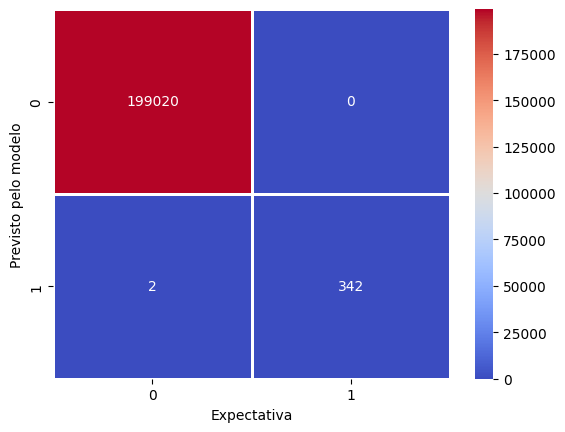

Acurácia: 99.998997%
Precisão: 100.000000%
Recall:  99.418605%
F1 Score:  99.708455%
MCC:  0.9970837757162465

MÉTRICAS TESTE
 
SEM SMOTE



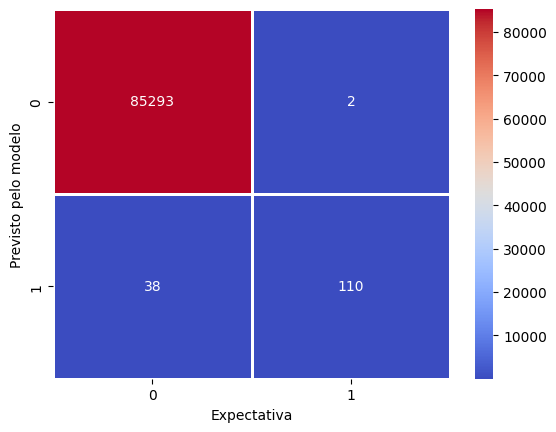

Acurácia: 99.953185%
Precisão: 98.214286%
Recall:  74.324324%
F1 Score:  84.615385%
MCC:  0.8541762341797497

MÉTRICA AUC ROC

Treinamento:  0.997093023255814 
Teste: 0.8716098976049735


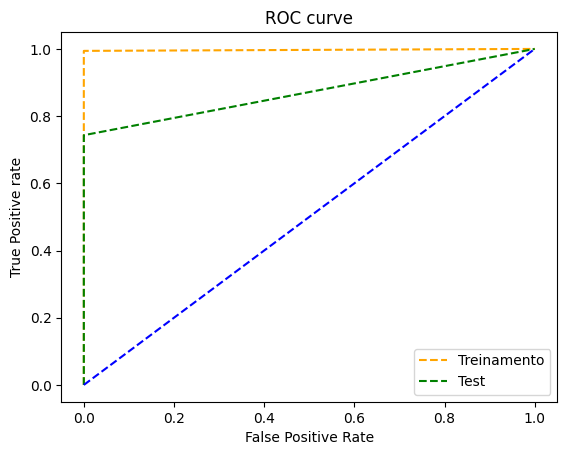

In [19]:
cf_matrix = confusion_matrix(y_train, y_pred_curl)
sn.heatmap(cf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Expectativa')
plt.ylabel('Previsto pelo modelo')
print("\nMÉTRICAS TREINAMENTO\n \nSEM SMOTE\n")
plt.show()
print(f'Acurácia: {accuracy_score(y_train, y_pred_curl):%}')
print(f'Precisão: {precision_score(y_train, y_pred_curl):%}')
print(f'Recall:  {recall_score(y_train, y_pred_curl):%}')
print(f'F1 Score:  {f1_score(y_train, y_pred_curl):%}')
print(f'MCC:  {matthews_corrcoef(y_train, y_pred_curl)}')
cf_matrix = confusion_matrix(y_test, resultado_curl)
sn.heatmap(cf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Expectativa')
plt.ylabel('Previsto pelo modelo')
print("\nMÉTRICAS TESTE\n \nSEM SMOTE\n")
plt.show()
print(f'Acurácia: {accuracy_score(y_test, resultado_curl):%}')
print(f'Precisão: {precision_score(y_test, resultado_curl):%}')
print(f'Recall:  {recall_score(y_test, resultado_curl):%}')
print(f'F1 Score:  {f1_score(y_test, resultado_curl):%}')
print(f'MCC:  {matthews_corrcoef(y_test, resultado_curl)}')


print("\nMÉTRICA AUC ROC\n")
fpr1, tpr1, thresh1 = roc_curve(y_train, y_pred_curl, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, resultado_curl, pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

auc_score1 = roc_auc_score(y_train, y_pred_curl)
auc_score2 = roc_auc_score(y_test, resultado_curl)

print("Treinamento: ",auc_score1, "\nTeste:", auc_score2)

plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Treinamento')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Test')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC')
plt.show();

#MODELO TREINAMENTO 10 : 90

#####**MODELO 1**

In [ ]:
model = RandomForestClassifier(n_estimators=10000, verbose=5)
model.fit(X_train_sm_1090, y_train_sm_1090)
y_pred_rl = model.predict(X_train_sm_1090)

print(classification_report(y_train_sm_1090, y_pred_rl))

building tree 1 of 10000
building tree 2 of 10000
building tree 3 of 10000
building tree 4 of 10000
building tree 5 of 10000
building tree 6 of 10000
building tree 7 of 10000
building tree 8 of 10000
building tree 9 of 10000
building tree 10 of 10000
building tree 11 of 10000
building tree 12 of 10000
building tree 13 of 10000
building tree 14 of 10000
building tree 15 of 10000
building tree 16 of 10000
building tree 17 of 10000


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:   21.7s


building tree 18 of 10000
building tree 19 of 10000
building tree 20 of 10000
building tree 21 of 10000
building tree 22 of 10000
building tree 23 of 10000
building tree 24 of 10000
building tree 25 of 10000
building tree 26 of 10000
building tree 27 of 10000
building tree 28 of 10000
building tree 29 of 10000
building tree 30 of 10000
building tree 31 of 10000
building tree 32 of 10000
building tree 33 of 10000
building tree 34 of 10000
building tree 35 of 10000
building tree 36 of 10000
building tree 37 of 10000
building tree 38 of 10000
building tree 39 of 10000
building tree 40 of 10000
building tree 41 of 10000
building tree 42 of 10000
building tree 43 of 10000
building tree 44 of 10000
building tree 45 of 10000
building tree 46 of 10000
building tree 47 of 10000
building tree 48 of 10000
building tree 49 of 10000
building tree 50 of 10000
building tree 51 of 10000
building tree 52 of 10000
building tree 53 of 10000
building tree 54 of 10000
building tree 55 of 10000
building tre

[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:  1.5min


building tree 72 of 10000
building tree 73 of 10000
building tree 74 of 10000
building tree 75 of 10000
building tree 76 of 10000
building tree 77 of 10000
building tree 78 of 10000
building tree 79 of 10000
building tree 80 of 10000
building tree 81 of 10000
building tree 82 of 10000
building tree 83 of 10000
building tree 84 of 10000
building tree 85 of 10000
building tree 86 of 10000
building tree 87 of 10000
building tree 88 of 10000
building tree 89 of 10000
building tree 90 of 10000
building tree 91 of 10000
building tree 92 of 10000
building tree 93 of 10000
building tree 94 of 10000
building tree 95 of 10000
building tree 96 of 10000
building tree 97 of 10000
building tree 98 of 10000
building tree 99 of 10000
building tree 100 of 10000
building tree 101 of 10000
building tree 102 of 10000
building tree 103 of 10000
building tree 104 of 10000
building tree 105 of 10000
building tree 106 of 10000
building tree 107 of 10000
building tree 108 of 10000
building tree 109 of 10000
bu

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:  3.5min


building tree 162 of 10000
building tree 163 of 10000
building tree 164 of 10000
building tree 165 of 10000
building tree 166 of 10000
building tree 167 of 10000
building tree 168 of 10000
building tree 169 of 10000
building tree 170 of 10000
building tree 171 of 10000
building tree 172 of 10000
building tree 173 of 10000
building tree 174 of 10000
building tree 175 of 10000
building tree 176 of 10000
building tree 177 of 10000
building tree 178 of 10000
building tree 179 of 10000
building tree 180 of 10000
building tree 181 of 10000
building tree 182 of 10000
building tree 183 of 10000
building tree 184 of 10000
building tree 185 of 10000
building tree 186 of 10000
building tree 187 of 10000
building tree 188 of 10000
building tree 189 of 10000
building tree 190 of 10000
building tree 191 of 10000
building tree 192 of 10000
building tree 193 of 10000
building tree 194 of 10000
building tree 195 of 10000
building tree 196 of 10000
building tree 197 of 10000
building tree 198 of 10000
b

[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:  6.4min


building tree 288 of 10000
building tree 289 of 10000
building tree 290 of 10000
building tree 291 of 10000
building tree 292 of 10000
building tree 293 of 10000
building tree 294 of 10000
building tree 295 of 10000
building tree 296 of 10000
building tree 297 of 10000
building tree 298 of 10000
building tree 299 of 10000
building tree 300 of 10000
building tree 301 of 10000
building tree 302 of 10000
building tree 303 of 10000
building tree 304 of 10000
building tree 305 of 10000
building tree 306 of 10000
building tree 307 of 10000
building tree 308 of 10000
building tree 309 of 10000
building tree 310 of 10000
building tree 311 of 10000
building tree 312 of 10000
building tree 313 of 10000
building tree 314 of 10000
building tree 315 of 10000
building tree 316 of 10000
building tree 317 of 10000
building tree 318 of 10000
building tree 319 of 10000
building tree 320 of 10000
building tree 321 of 10000
building tree 322 of 10000
building tree 323 of 10000
building tree 324 of 10000
b

[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed: 10.3min


building tree 450 of 10000
building tree 451 of 10000
building tree 452 of 10000
building tree 453 of 10000
building tree 454 of 10000
building tree 455 of 10000
building tree 456 of 10000
building tree 457 of 10000
building tree 458 of 10000
building tree 459 of 10000
building tree 460 of 10000
building tree 461 of 10000
building tree 462 of 10000
building tree 463 of 10000
building tree 464 of 10000
building tree 465 of 10000
building tree 466 of 10000
building tree 467 of 10000
building tree 468 of 10000
building tree 469 of 10000
building tree 470 of 10000
building tree 471 of 10000
building tree 472 of 10000
building tree 473 of 10000
building tree 474 of 10000
building tree 475 of 10000
building tree 476 of 10000
building tree 477 of 10000
building tree 478 of 10000
building tree 479 of 10000
building tree 480 of 10000
building tree 481 of 10000
building tree 482 of 10000
building tree 483 of 10000
building tree 484 of 10000
building tree 485 of 10000
building tree 486 of 10000
b

[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed: 15.0min


building tree 648 of 10000
building tree 649 of 10000
building tree 650 of 10000
building tree 651 of 10000
building tree 652 of 10000
building tree 653 of 10000
building tree 654 of 10000
building tree 655 of 10000
building tree 656 of 10000
building tree 657 of 10000
building tree 658 of 10000
building tree 659 of 10000
building tree 660 of 10000
building tree 661 of 10000
building tree 662 of 10000
building tree 663 of 10000
building tree 664 of 10000
building tree 665 of 10000
building tree 666 of 10000
building tree 667 of 10000
building tree 668 of 10000
building tree 669 of 10000
building tree 670 of 10000
building tree 671 of 10000
building tree 672 of 10000
building tree 673 of 10000
building tree 674 of 10000
building tree 675 of 10000
building tree 676 of 10000
building tree 677 of 10000
building tree 678 of 10000
building tree 679 of 10000
building tree 680 of 10000
building tree 681 of 10000
building tree 682 of 10000
building tree 683 of 10000
building tree 684 of 10000
b

[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed: 20.6min


building tree 882 of 10000
building tree 883 of 10000
building tree 884 of 10000
building tree 885 of 10000
building tree 886 of 10000
building tree 887 of 10000
building tree 888 of 10000
building tree 889 of 10000
building tree 890 of 10000
building tree 891 of 10000
building tree 892 of 10000
building tree 893 of 10000
building tree 894 of 10000
building tree 895 of 10000
building tree 896 of 10000
building tree 897 of 10000
building tree 898 of 10000
building tree 899 of 10000
building tree 900 of 10000
building tree 901 of 10000
building tree 902 of 10000
building tree 903 of 10000
building tree 904 of 10000
building tree 905 of 10000
building tree 906 of 10000
building tree 907 of 10000
building tree 908 of 10000
building tree 909 of 10000
building tree 910 of 10000
building tree 911 of 10000
building tree 912 of 10000
building tree 913 of 10000
building tree 914 of 10000
building tree 915 of 10000
building tree 916 of 10000
building tree 917 of 10000
building tree 918 of 10000
b

[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed: 26.7min


building tree 1152 of 10000
building tree 1153 of 10000
building tree 1154 of 10000
building tree 1155 of 10000
building tree 1156 of 10000
building tree 1157 of 10000
building tree 1158 of 10000
building tree 1159 of 10000
building tree 1160 of 10000
building tree 1161 of 10000
building tree 1162 of 10000
building tree 1163 of 10000
building tree 1164 of 10000
building tree 1165 of 10000
building tree 1166 of 10000
building tree 1167 of 10000
building tree 1168 of 10000
building tree 1169 of 10000
building tree 1170 of 10000
building tree 1171 of 10000
building tree 1172 of 10000
building tree 1173 of 10000
building tree 1174 of 10000
building tree 1175 of 10000
building tree 1176 of 10000
building tree 1177 of 10000
building tree 1178 of 10000
building tree 1179 of 10000
building tree 1180 of 10000
building tree 1181 of 10000
building tree 1182 of 10000
building tree 1183 of 10000
building tree 1184 of 10000
building tree 1185 of 10000
building tree 1186 of 10000
building tree 1187 o

[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed: 33.7min


building tree 1458 of 10000
building tree 1459 of 10000
building tree 1460 of 10000
building tree 1461 of 10000
building tree 1462 of 10000
building tree 1463 of 10000
building tree 1464 of 10000
building tree 1465 of 10000
building tree 1466 of 10000
building tree 1467 of 10000
building tree 1468 of 10000
building tree 1469 of 10000
building tree 1470 of 10000
building tree 1471 of 10000
building tree 1472 of 10000
building tree 1473 of 10000
building tree 1474 of 10000
building tree 1475 of 10000
building tree 1476 of 10000
building tree 1477 of 10000
building tree 1478 of 10000
building tree 1479 of 10000
building tree 1480 of 10000
building tree 1481 of 10000
building tree 1482 of 10000
building tree 1483 of 10000
building tree 1484 of 10000
building tree 1485 of 10000
building tree 1486 of 10000
building tree 1487 of 10000
building tree 1488 of 10000
building tree 1489 of 10000
building tree 1490 of 10000
building tree 1491 of 10000
building tree 1492 of 10000
building tree 1493 o

[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed: 42.0min


building tree 1800 of 10000
building tree 1801 of 10000
building tree 1802 of 10000
building tree 1803 of 10000
building tree 1804 of 10000
building tree 1805 of 10000
building tree 1806 of 10000
building tree 1807 of 10000
building tree 1808 of 10000
building tree 1809 of 10000
building tree 1810 of 10000
building tree 1811 of 10000
building tree 1812 of 10000
building tree 1813 of 10000
building tree 1814 of 10000
building tree 1815 of 10000
building tree 1816 of 10000
building tree 1817 of 10000
building tree 1818 of 10000
building tree 1819 of 10000
building tree 1820 of 10000
building tree 1821 of 10000
building tree 1822 of 10000
building tree 1823 of 10000
building tree 1824 of 10000
building tree 1825 of 10000
building tree 1826 of 10000
building tree 1827 of 10000
building tree 1828 of 10000
building tree 1829 of 10000
building tree 1830 of 10000
building tree 1831 of 10000
building tree 1832 of 10000
building tree 1833 of 10000
building tree 1834 of 10000
building tree 1835 o

[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed: 50.9min


building tree 2178 of 10000
building tree 2179 of 10000
building tree 2180 of 10000
building tree 2181 of 10000
building tree 2182 of 10000
building tree 2183 of 10000
building tree 2184 of 10000
building tree 2185 of 10000
building tree 2186 of 10000
building tree 2187 of 10000
building tree 2188 of 10000
building tree 2189 of 10000
building tree 2190 of 10000
building tree 2191 of 10000
building tree 2192 of 10000
building tree 2193 of 10000
building tree 2194 of 10000
building tree 2195 of 10000
building tree 2196 of 10000
building tree 2197 of 10000
building tree 2198 of 10000
building tree 2199 of 10000
building tree 2200 of 10000
building tree 2201 of 10000
building tree 2202 of 10000
building tree 2203 of 10000
building tree 2204 of 10000
building tree 2205 of 10000
building tree 2206 of 10000
building tree 2207 of 10000
building tree 2208 of 10000
building tree 2209 of 10000
building tree 2210 of 10000
building tree 2211 of 10000
building tree 2212 of 10000
building tree 2213 o

[Parallel(n_jobs=1)]: Done 2591 tasks      | elapsed: 60.5min


building tree 2592 of 10000
building tree 2593 of 10000
building tree 2594 of 10000
building tree 2595 of 10000
building tree 2596 of 10000
building tree 2597 of 10000
building tree 2598 of 10000
building tree 2599 of 10000
building tree 2600 of 10000
building tree 2601 of 10000
building tree 2602 of 10000
building tree 2603 of 10000
building tree 2604 of 10000
building tree 2605 of 10000
building tree 2606 of 10000
building tree 2607 of 10000
building tree 2608 of 10000
building tree 2609 of 10000
building tree 2610 of 10000
building tree 2611 of 10000
building tree 2612 of 10000
building tree 2613 of 10000
building tree 2614 of 10000
building tree 2615 of 10000
building tree 2616 of 10000
building tree 2617 of 10000
building tree 2618 of 10000
building tree 2619 of 10000
building tree 2620 of 10000
building tree 2621 of 10000
building tree 2622 of 10000
building tree 2623 of 10000
building tree 2624 of 10000
building tree 2625 of 10000
building tree 2626 of 10000
building tree 2627 o

[Parallel(n_jobs=1)]: Done 3041 tasks      | elapsed: 70.9min


building tree 3042 of 10000
building tree 3043 of 10000
building tree 3044 of 10000
building tree 3045 of 10000
building tree 3046 of 10000
building tree 3047 of 10000
building tree 3048 of 10000
building tree 3049 of 10000
building tree 3050 of 10000
building tree 3051 of 10000
building tree 3052 of 10000
building tree 3053 of 10000
building tree 3054 of 10000
building tree 3055 of 10000
building tree 3056 of 10000
building tree 3057 of 10000
building tree 3058 of 10000
building tree 3059 of 10000
building tree 3060 of 10000
building tree 3061 of 10000
building tree 3062 of 10000
building tree 3063 of 10000
building tree 3064 of 10000
building tree 3065 of 10000
building tree 3066 of 10000
building tree 3067 of 10000
building tree 3068 of 10000
building tree 3069 of 10000
building tree 3070 of 10000
building tree 3071 of 10000
building tree 3072 of 10000
building tree 3073 of 10000
building tree 3074 of 10000
building tree 3075 of 10000
building tree 3076 of 10000
building tree 3077 o

[Parallel(n_jobs=1)]: Done 3527 tasks      | elapsed: 82.3min


building tree 3528 of 10000
building tree 3529 of 10000
building tree 3530 of 10000
building tree 3531 of 10000
building tree 3532 of 10000
building tree 3533 of 10000
building tree 3534 of 10000
building tree 3535 of 10000
building tree 3536 of 10000
building tree 3537 of 10000
building tree 3538 of 10000
building tree 3539 of 10000
building tree 3540 of 10000
building tree 3541 of 10000
building tree 3542 of 10000
building tree 3543 of 10000
building tree 3544 of 10000
building tree 3545 of 10000
building tree 3546 of 10000
building tree 3547 of 10000
building tree 3548 of 10000
building tree 3549 of 10000
building tree 3550 of 10000
building tree 3551 of 10000
building tree 3552 of 10000
building tree 3553 of 10000
building tree 3554 of 10000
building tree 3555 of 10000
building tree 3556 of 10000
building tree 3557 of 10000
building tree 3558 of 10000
building tree 3559 of 10000
building tree 3560 of 10000
building tree 3561 of 10000
building tree 3562 of 10000
building tree 3563 o

[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed: 94.4min


building tree 4050 of 10000
building tree 4051 of 10000
building tree 4052 of 10000
building tree 4053 of 10000
building tree 4054 of 10000
building tree 4055 of 10000
building tree 4056 of 10000
building tree 4057 of 10000
building tree 4058 of 10000
building tree 4059 of 10000
building tree 4060 of 10000
building tree 4061 of 10000
building tree 4062 of 10000
building tree 4063 of 10000
building tree 4064 of 10000
building tree 4065 of 10000
building tree 4066 of 10000
building tree 4067 of 10000
building tree 4068 of 10000
building tree 4069 of 10000
building tree 4070 of 10000
building tree 4071 of 10000
building tree 4072 of 10000
building tree 4073 of 10000
building tree 4074 of 10000
building tree 4075 of 10000
building tree 4076 of 10000
building tree 4077 of 10000
building tree 4078 of 10000
building tree 4079 of 10000
building tree 4080 of 10000
building tree 4081 of 10000
building tree 4082 of 10000
building tree 4083 of 10000
building tree 4084 of 10000
building tree 4085 o

[Parallel(n_jobs=1)]: Done 4607 tasks      | elapsed: 107.2min


building tree 4608 of 10000
building tree 4609 of 10000
building tree 4610 of 10000
building tree 4611 of 10000
building tree 4612 of 10000
building tree 4613 of 10000
building tree 4614 of 10000
building tree 4615 of 10000
building tree 4616 of 10000
building tree 4617 of 10000
building tree 4618 of 10000
building tree 4619 of 10000
building tree 4620 of 10000
building tree 4621 of 10000
building tree 4622 of 10000
building tree 4623 of 10000
building tree 4624 of 10000
building tree 4625 of 10000
building tree 4626 of 10000
building tree 4627 of 10000
building tree 4628 of 10000
building tree 4629 of 10000
building tree 4630 of 10000
building tree 4631 of 10000
building tree 4632 of 10000
building tree 4633 of 10000
building tree 4634 of 10000
building tree 4635 of 10000
building tree 4636 of 10000
building tree 4637 of 10000
building tree 4638 of 10000
building tree 4639 of 10000
building tree 4640 of 10000
building tree 4641 of 10000
building tree 4642 of 10000
building tree 4643 o

[Parallel(n_jobs=1)]: Done 5201 tasks      | elapsed: 120.6min


building tree 5202 of 10000
building tree 5203 of 10000
building tree 5204 of 10000
building tree 5205 of 10000
building tree 5206 of 10000
building tree 5207 of 10000
building tree 5208 of 10000
building tree 5209 of 10000
building tree 5210 of 10000
building tree 5211 of 10000
building tree 5212 of 10000
building tree 5213 of 10000
building tree 5214 of 10000
building tree 5215 of 10000
building tree 5216 of 10000
building tree 5217 of 10000
building tree 5218 of 10000
building tree 5219 of 10000
building tree 5220 of 10000
building tree 5221 of 10000
building tree 5222 of 10000
building tree 5223 of 10000
building tree 5224 of 10000
building tree 5225 of 10000
building tree 5226 of 10000
building tree 5227 of 10000
building tree 5228 of 10000
building tree 5229 of 10000
building tree 5230 of 10000
building tree 5231 of 10000
building tree 5232 of 10000
building tree 5233 of 10000
building tree 5234 of 10000
building tree 5235 of 10000
building tree 5236 of 10000
building tree 5237 o

[Parallel(n_jobs=1)]: Done 5831 tasks      | elapsed: 135.0min


building tree 5832 of 10000
building tree 5833 of 10000
building tree 5834 of 10000
building tree 5835 of 10000
building tree 5836 of 10000
building tree 5837 of 10000
building tree 5838 of 10000
building tree 5839 of 10000
building tree 5840 of 10000
building tree 5841 of 10000
building tree 5842 of 10000
building tree 5843 of 10000
building tree 5844 of 10000
building tree 5845 of 10000
building tree 5846 of 10000
building tree 5847 of 10000
building tree 5848 of 10000
building tree 5849 of 10000
building tree 5850 of 10000
building tree 5851 of 10000
building tree 5852 of 10000
building tree 5853 of 10000
building tree 5854 of 10000
building tree 5855 of 10000
building tree 5856 of 10000
building tree 5857 of 10000
building tree 5858 of 10000
building tree 5859 of 10000
building tree 5860 of 10000
building tree 5861 of 10000
building tree 5862 of 10000
building tree 5863 of 10000
building tree 5864 of 10000
building tree 5865 of 10000
building tree 5866 of 10000
building tree 5867 o

[Parallel(n_jobs=1)]: Done 6497 tasks      | elapsed: 150.4min


building tree 6498 of 10000
building tree 6499 of 10000
building tree 6500 of 10000
building tree 6501 of 10000
building tree 6502 of 10000
building tree 6503 of 10000
building tree 6504 of 10000
building tree 6505 of 10000
building tree 6506 of 10000
building tree 6507 of 10000
building tree 6508 of 10000
building tree 6509 of 10000
building tree 6510 of 10000
building tree 6511 of 10000
building tree 6512 of 10000
building tree 6513 of 10000
building tree 6514 of 10000
building tree 6515 of 10000
building tree 6516 of 10000
building tree 6517 of 10000
building tree 6518 of 10000
building tree 6519 of 10000
building tree 6520 of 10000
building tree 6521 of 10000
building tree 6522 of 10000
building tree 6523 of 10000
building tree 6524 of 10000
building tree 6525 of 10000
building tree 6526 of 10000
building tree 6527 of 10000
building tree 6528 of 10000
building tree 6529 of 10000
building tree 6530 of 10000
building tree 6531 of 10000
building tree 6532 of 10000
building tree 6533 o

[Parallel(n_jobs=1)]: Done 7199 tasks      | elapsed: 167.1min


building tree 7200 of 10000
building tree 7201 of 10000
building tree 7202 of 10000
building tree 7203 of 10000
building tree 7204 of 10000
building tree 7205 of 10000
building tree 7206 of 10000
building tree 7207 of 10000
building tree 7208 of 10000
building tree 7209 of 10000
building tree 7210 of 10000
building tree 7211 of 10000
building tree 7212 of 10000
building tree 7213 of 10000
building tree 7214 of 10000
building tree 7215 of 10000
building tree 7216 of 10000
building tree 7217 of 10000
building tree 7218 of 10000
building tree 7219 of 10000
building tree 7220 of 10000
building tree 7221 of 10000
building tree 7222 of 10000
building tree 7223 of 10000
building tree 7224 of 10000
building tree 7225 of 10000
building tree 7226 of 10000
building tree 7227 of 10000
building tree 7228 of 10000
building tree 7229 of 10000
building tree 7230 of 10000
building tree 7231 of 10000
building tree 7232 of 10000
building tree 7233 of 10000
building tree 7234 of 10000
building tree 7235 o

[Parallel(n_jobs=1)]: Done 7937 tasks      | elapsed: 184.1min


building tree 7938 of 10000
building tree 7939 of 10000
building tree 7940 of 10000
building tree 7941 of 10000
building tree 7942 of 10000
building tree 7943 of 10000
building tree 7944 of 10000
building tree 7945 of 10000
building tree 7946 of 10000
building tree 7947 of 10000
building tree 7948 of 10000
building tree 7949 of 10000
building tree 7950 of 10000
building tree 7951 of 10000
building tree 7952 of 10000
building tree 7953 of 10000
building tree 7954 of 10000
building tree 7955 of 10000
building tree 7956 of 10000
building tree 7957 of 10000
building tree 7958 of 10000
building tree 7959 of 10000
building tree 7960 of 10000
building tree 7961 of 10000
building tree 7962 of 10000
building tree 7963 of 10000
building tree 7964 of 10000
building tree 7965 of 10000
building tree 7966 of 10000
building tree 7967 of 10000
building tree 7968 of 10000
building tree 7969 of 10000
building tree 7970 of 10000
building tree 7971 of 10000
building tree 7972 of 10000
building tree 7973 o

[Parallel(n_jobs=1)]: Done 8711 tasks      | elapsed: 202.2min


building tree 8712 of 10000
building tree 8713 of 10000
building tree 8714 of 10000
building tree 8715 of 10000
building tree 8716 of 10000
building tree 8717 of 10000
building tree 8718 of 10000
building tree 8719 of 10000
building tree 8720 of 10000
building tree 8721 of 10000
building tree 8722 of 10000
building tree 8723 of 10000
building tree 8724 of 10000
building tree 8725 of 10000
building tree 8726 of 10000
building tree 8727 of 10000
building tree 8728 of 10000
building tree 8729 of 10000
building tree 8730 of 10000
building tree 8731 of 10000
building tree 8732 of 10000
building tree 8733 of 10000
building tree 8734 of 10000
building tree 8735 of 10000
building tree 8736 of 10000
building tree 8737 of 10000
building tree 8738 of 10000
building tree 8739 of 10000
building tree 8740 of 10000
building tree 8741 of 10000
building tree 8742 of 10000
building tree 8743 of 10000
building tree 8744 of 10000
building tree 8745 of 10000
building tree 8746 of 10000
building tree 8747 o

[Parallel(n_jobs=1)]: Done 9521 tasks      | elapsed: 220.4min


building tree 9522 of 10000
building tree 9523 of 10000
building tree 9524 of 10000
building tree 9525 of 10000
building tree 9526 of 10000
building tree 9527 of 10000
building tree 9528 of 10000
building tree 9529 of 10000
building tree 9530 of 10000
building tree 9531 of 10000
building tree 9532 of 10000
building tree 9533 of 10000
building tree 9534 of 10000
building tree 9535 of 10000
building tree 9536 of 10000
building tree 9537 of 10000
building tree 9538 of 10000
building tree 9539 of 10000
building tree 9540 of 10000
building tree 9541 of 10000
building tree 9542 of 10000
building tree 9543 of 10000
building tree 9544 of 10000
building tree 9545 of 10000
building tree 9546 of 10000
building tree 9547 of 10000
building tree 9548 of 10000
building tree 9549 of 10000
building tree 9550 of 10000
building tree 9551 of 10000
building tree 9552 of 10000
building tree 9553 of 10000
building tree 9554 of 10000
building tree 9555 of 10000
building tree 9556 of 10000
building tree 9557 o

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    4.2s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    6.0s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    8.3s
[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed:   10.8s
[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed:   13.7s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:   16.9s
[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed:   20.5s
[Parallel(n_jobs=1)]: Done 2591 tasks      | elapsed:   24.3s
[Parallel(n_jobs=1)]: Done 3041 tasks      | elapsed:   28.5s
[Parallel(n_jobs=1)]: Done 3527 tasks      | elapsed:   33.0s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:   37.9s
[Parallel(n_jobs=1)]: Done 4607 tasks      | elapsed:   43.1s
[Parallel(n_job

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    191146
           1       1.00      1.00      1.00     14770

    accuracy                           1.00    205916
   macro avg       1.00      1.00      1.00    205916
weighted avg       1.00      1.00      1.00    205916



In [ ]:
print(X_test)
resultado_rl = model.predict(X_test)

            Time        V1        V2        V3        V4        V5        V6  \
186882  127294.0 -2.537331  1.890864 -0.840555 -1.102759 -2.105725  0.367811   
165754  117632.0 -0.250839  1.104108  0.206089  0.417324  1.204079 -0.350694   
235285  148330.0  0.568980 -2.520416 -1.114138  1.670652 -1.128945  0.398822   
101271   67778.0  1.328892  0.226908 -0.308968  0.381772  0.238490 -0.282946   
5832      6308.0  1.124863 -0.165691  1.337053  1.030033 -0.891116  0.202926   
...          ...       ...       ...       ...       ...       ...       ...   
64725    51279.0 -1.808185  1.328808 -0.991449 -2.473986  2.185095  3.496806   
16688    28048.0 -0.442905  0.716727  1.256775  0.860048  1.210872  1.066390   
183868  125990.0  2.092418 -0.931315 -1.553089 -1.131369 -0.197801 -0.373117   
45011    42168.0  1.293234  0.097565 -0.209304  0.329036  0.034958 -0.145507   
150527   93609.0  2.214016 -0.584030 -1.238673 -0.702993 -0.184492 -0.646248   

              V7        V8        V9  .

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed:    4.6s
[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed:    5.8s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    7.1s
[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed:    8.6s
[Parallel(n_jobs=1)]: Done 2591 tasks      | elapsed:   10.2s
[Parallel(n_jobs=1)]: Done 3041 tasks      | elapsed:   12.0s
[Parallel(n_jobs=1)]: Done 3527 tasks      | elapsed:   13.9s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:   15.9s
[Parallel(n_jobs=1)]: Done 4607 tasks      | elapsed:   18.1s
[Parallel(n_job


MÉTRICAS TREINAMENTO
 
SMOTE 1090



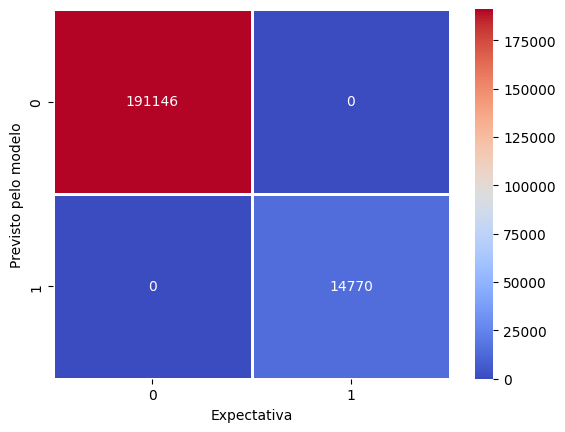

Acurácia: 100.000000%
Precisão: 100.000000%
Recall:  100.000000%
F1 Score:  100.000000%
MCC:  1.0

MÉTRICAS TESTE
 
SMOTE 1090



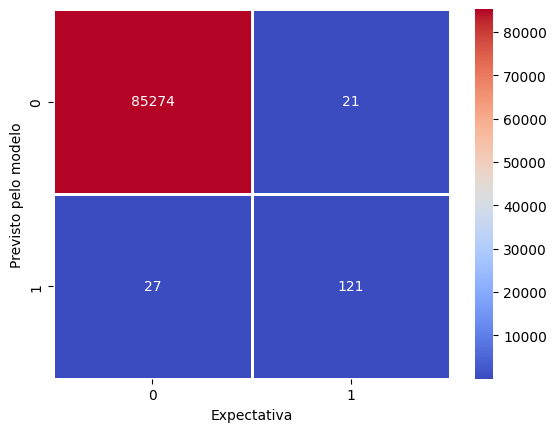

Acurácia: 99.943822%
Precisão: 85.211268%
Recall:  81.756757%
F1 Score:  83.448276%
MCC:  0.8343807226905903

MÉTRICA AUC ROC

Treinamento:  1.0 
Teste: 0.9086606816089786


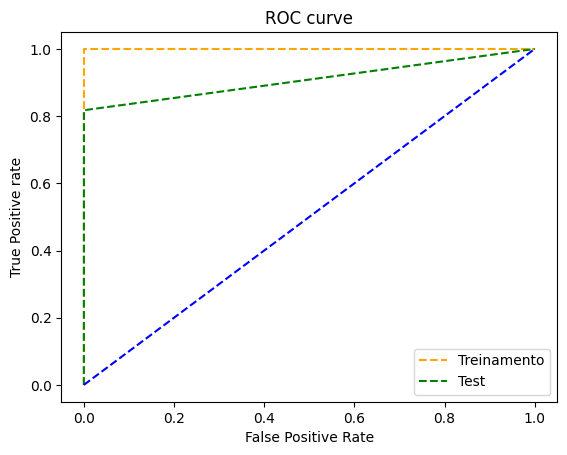

In [ ]:
cf_matrix = confusion_matrix(y_train_sm_1090, y_pred_rl)
sn.heatmap(cf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Expectativa')
plt.ylabel('Previsto pelo modelo')
print("\nMÉTRICAS TREINAMENTO\n \nSMOTE 1090\n")
plt.show()
print(f'Acurácia: {accuracy_score(y_train_sm_1090, y_pred_rl):%}')
print(f'Precisão: {precision_score(y_train_sm_1090, y_pred_rl):%}')
print(f'Recall:  {recall_score(y_train_sm_1090, y_pred_rl):%}')
print(f'F1 Score:  {f1_score(y_train_sm_1090, y_pred_rl):%}')
print(f'MCC:  {matthews_corrcoef(y_train_sm_1090, y_pred_rl)}')
cf_matrix = confusion_matrix(y_test, resultado_rl)
sn.heatmap(cf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Expectativa')
plt.ylabel('Previsto pelo modelo')
print("\nMÉTRICAS TESTE\n \nSMOTE 1090\n")
plt.show()
print(f'Acurácia: {accuracy_score(y_test, resultado_rl):%}')
print(f'Precisão: {precision_score(y_test, resultado_rl):%}')
print(f'Recall:  {recall_score(y_test, resultado_rl):%}')
print(f'F1 Score:  {f1_score(y_test, resultado_rl):%}')
print(f'MCC:  {matthews_corrcoef(y_test, resultado_rl)}')


print("\nMÉTRICA AUC ROC\n")
fpr1, tpr1, thresh1 = roc_curve(y_train_sm_1090, y_pred_rl, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, resultado_rl, pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

auc_score1 = roc_auc_score(y_train_sm_1090, y_pred_rl)
auc_score2 = roc_auc_score(y_test, resultado_rl)

print("Treinamento: ",auc_score1, "\nTeste:", auc_score2)

plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Treinamento')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Test')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC')
plt.show();

#####**MODELO 2**

In [20]:
model = cuRandomForestClassifier(n_estimators=10000, verbose=5)
model.fit(X_train_sm_1090, y_train_sm_1090)
y_pred_curl = model.predict(X_train_sm_1090)

print(classification_report(y_train_sm_1090, y_pred_curl))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    191146
           1       1.00      1.00      1.00     14770

    accuracy                           1.00    205916
   macro avg       1.00      1.00      1.00    205916
weighted avg       1.00      1.00      1.00    205916



In [21]:
print(X_test)
resultado_curl = model.predict(X_test)

            Time        V1        V2        V3        V4        V5        V6  \
186882  127294.0 -2.537331  1.890864 -0.840555 -1.102759 -2.105725  0.367811   
165754  117632.0 -0.250839  1.104108  0.206089  0.417324  1.204079 -0.350694   
235285  148330.0  0.568980 -2.520416 -1.114138  1.670652 -1.128945  0.398822   
101271   67778.0  1.328892  0.226908 -0.308968  0.381772  0.238490 -0.282946   
5832      6308.0  1.124863 -0.165691  1.337053  1.030033 -0.891116  0.202926   
...          ...       ...       ...       ...       ...       ...       ...   
64725    51279.0 -1.808185  1.328808 -0.991449 -2.473986  2.185095  3.496806   
16688    28048.0 -0.442905  0.716727  1.256775  0.860048  1.210872  1.066390   
183868  125990.0  2.092418 -0.931315 -1.553089 -1.131369 -0.197801 -0.373117   
45011    42168.0  1.293234  0.097565 -0.209304  0.329036  0.034958 -0.145507   
150527   93609.0  2.214016 -0.584030 -1.238673 -0.702993 -0.184492 -0.646248   

              V7        V8        V9  .


MÉTRICAS TREINAMENTO
 
SMOTE 1090



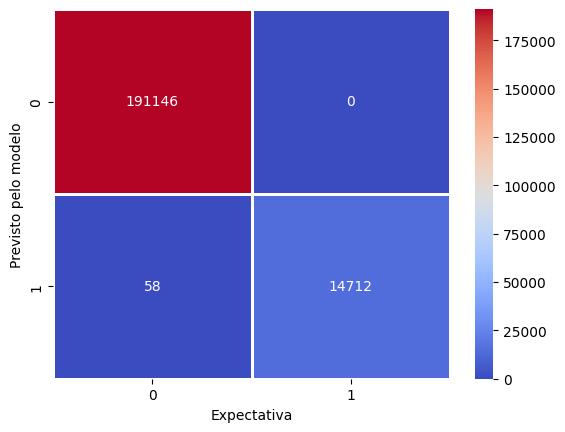

Acurácia: 99.971833%
Precisão: 100.000000%
Recall:  99.607312%
F1 Score:  99.803270%
MCC:  0.9978832453951721

MÉTRICAS TESTE
 
SMOTE 1090



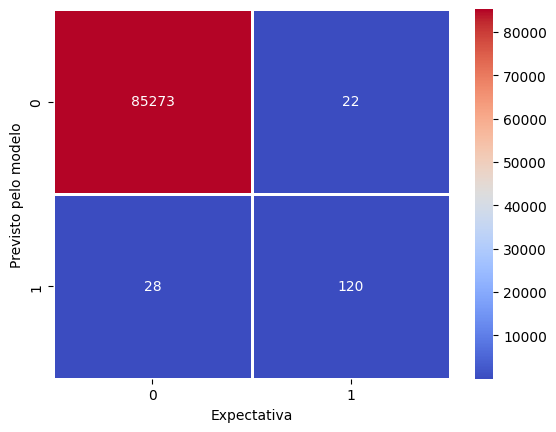

Acurácia: 99.941481%
Precisão: 84.507042%
Recall:  81.081081%
F1 Score:  82.758621%
MCC:  0.8274709682985166

MÉTRICA AUC ROC

Treinamento:  0.9980365605958024 
Teste: 0.9052764412222764


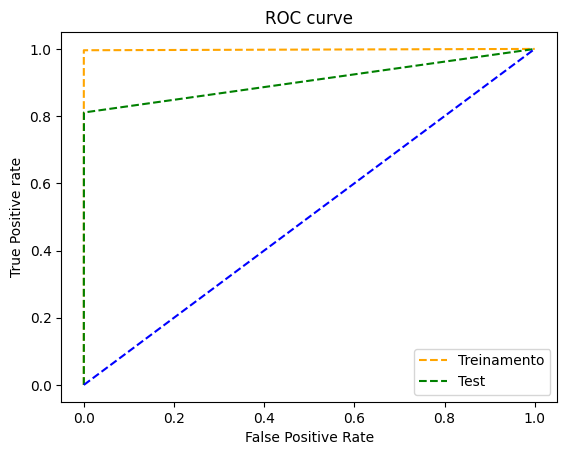

In [22]:
cf_matrix = confusion_matrix(y_train_sm_1090, y_pred_curl)
sn.heatmap(cf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Expectativa')
plt.ylabel('Previsto pelo modelo')
print("\nMÉTRICAS TREINAMENTO\n \nSMOTE 1090\n")
plt.show()
print(f'Acurácia: {accuracy_score(y_train_sm_1090, y_pred_curl):%}')
print(f'Precisão: {precision_score(y_train_sm_1090, y_pred_curl):%}')
print(f'Recall:  {recall_score(y_train_sm_1090, y_pred_curl):%}')
print(f'F1 Score:  {f1_score(y_train_sm_1090, y_pred_curl):%}')
print(f'MCC:  {matthews_corrcoef(y_train_sm_1090, y_pred_curl)}')
cf_matrix = confusion_matrix(y_test, resultado_curl)
sn.heatmap(cf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Expectativa')
plt.ylabel('Previsto pelo modelo')
print("\nMÉTRICAS TESTE\n \nSMOTE 1090\n")
plt.show()
print(f'Acurácia: {accuracy_score(y_test, resultado_curl):%}')
print(f'Precisão: {precision_score(y_test, resultado_curl):%}')
print(f'Recall:  {recall_score(y_test, resultado_curl):%}')
print(f'F1 Score:  {f1_score(y_test, resultado_curl):%}')
print(f'MCC:  {matthews_corrcoef(y_test, resultado_curl)}')


print("\nMÉTRICA AUC ROC\n")
fpr1, tpr1, thresh1 = roc_curve(y_train_sm_1090, y_pred_curl, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, resultado_curl, pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

auc_score1 = roc_auc_score(y_train_sm_1090, y_pred_curl)
auc_score2 = roc_auc_score(y_test, resultado_curl)

print("Treinamento: ",auc_score1, "\nTeste:", auc_score2)

plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Treinamento')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Test')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC')
plt.show();

#**MODELOS TREINAMENTO 50:50**

#####**MODELO 1**

In [ ]:
model = RandomForestClassifier(n_estimators=10000, verbose=5)
model.fit(X_train_sm_5050,y_train_sm_5050)
y_pred_rl = model.predict(X_train_sm_5050)

print(classification_report(y_train_sm_5050, y_pred_rl))

building tree 1 of 10000
building tree 2 of 10000
building tree 3 of 10000
building tree 4 of 10000
building tree 5 of 10000
building tree 6 of 10000
building tree 7 of 10000
building tree 8 of 10000
building tree 9 of 10000
building tree 10 of 10000
building tree 11 of 10000
building tree 12 of 10000
building tree 13 of 10000
building tree 14 of 10000
building tree 15 of 10000
building tree 16 of 10000
building tree 17 of 10000


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:   41.3s


building tree 18 of 10000
building tree 19 of 10000
building tree 20 of 10000
building tree 21 of 10000
building tree 22 of 10000
building tree 23 of 10000
building tree 24 of 10000
building tree 25 of 10000
building tree 26 of 10000
building tree 27 of 10000
building tree 28 of 10000
building tree 29 of 10000
building tree 30 of 10000
building tree 31 of 10000
building tree 32 of 10000
building tree 33 of 10000
building tree 34 of 10000
building tree 35 of 10000
building tree 36 of 10000
building tree 37 of 10000
building tree 38 of 10000
building tree 39 of 10000
building tree 40 of 10000
building tree 41 of 10000
building tree 42 of 10000
building tree 43 of 10000
building tree 44 of 10000
building tree 45 of 10000
building tree 46 of 10000
building tree 47 of 10000
building tree 48 of 10000
building tree 49 of 10000
building tree 50 of 10000
building tree 51 of 10000
building tree 52 of 10000
building tree 53 of 10000
building tree 54 of 10000
building tree 55 of 10000
building tre

[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:  2.9min


building tree 72 of 10000
building tree 73 of 10000
building tree 74 of 10000
building tree 75 of 10000
building tree 76 of 10000
building tree 77 of 10000
building tree 78 of 10000
building tree 79 of 10000
building tree 80 of 10000
building tree 81 of 10000
building tree 82 of 10000
building tree 83 of 10000
building tree 84 of 10000
building tree 85 of 10000
building tree 86 of 10000
building tree 87 of 10000
building tree 88 of 10000
building tree 89 of 10000
building tree 90 of 10000
building tree 91 of 10000
building tree 92 of 10000
building tree 93 of 10000
building tree 94 of 10000
building tree 95 of 10000
building tree 96 of 10000
building tree 97 of 10000
building tree 98 of 10000
building tree 99 of 10000
building tree 100 of 10000
building tree 101 of 10000
building tree 102 of 10000
building tree 103 of 10000
building tree 104 of 10000
building tree 105 of 10000
building tree 106 of 10000
building tree 107 of 10000
building tree 108 of 10000
building tree 109 of 10000
bu

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:  6.7min


building tree 162 of 10000
building tree 163 of 10000
building tree 164 of 10000
building tree 165 of 10000
building tree 166 of 10000
building tree 167 of 10000
building tree 168 of 10000
building tree 169 of 10000
building tree 170 of 10000
building tree 171 of 10000
building tree 172 of 10000
building tree 173 of 10000
building tree 174 of 10000
building tree 175 of 10000
building tree 176 of 10000
building tree 177 of 10000
building tree 178 of 10000
building tree 179 of 10000
building tree 180 of 10000
building tree 181 of 10000
building tree 182 of 10000
building tree 183 of 10000
building tree 184 of 10000
building tree 185 of 10000
building tree 186 of 10000
building tree 187 of 10000
building tree 188 of 10000
building tree 189 of 10000
building tree 190 of 10000
building tree 191 of 10000
building tree 192 of 10000
building tree 193 of 10000
building tree 194 of 10000
building tree 195 of 10000
building tree 196 of 10000
building tree 197 of 10000
building tree 198 of 10000
b

[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed: 11.9min


building tree 288 of 10000
building tree 289 of 10000
building tree 290 of 10000
building tree 291 of 10000
building tree 292 of 10000
building tree 293 of 10000
building tree 294 of 10000
building tree 295 of 10000
building tree 296 of 10000
building tree 297 of 10000
building tree 298 of 10000
building tree 299 of 10000
building tree 300 of 10000
building tree 301 of 10000
building tree 302 of 10000
building tree 303 of 10000
building tree 304 of 10000
building tree 305 of 10000
building tree 306 of 10000
building tree 307 of 10000
building tree 308 of 10000
building tree 309 of 10000
building tree 310 of 10000
building tree 311 of 10000
building tree 312 of 10000
building tree 313 of 10000
building tree 314 of 10000
building tree 315 of 10000
building tree 316 of 10000
building tree 317 of 10000
building tree 318 of 10000
building tree 319 of 10000
building tree 320 of 10000
building tree 321 of 10000
building tree 322 of 10000
building tree 323 of 10000
building tree 324 of 10000
b

[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed: 18.6min


building tree 450 of 10000
building tree 451 of 10000
building tree 452 of 10000
building tree 453 of 10000
building tree 454 of 10000
building tree 455 of 10000
building tree 456 of 10000
building tree 457 of 10000
building tree 458 of 10000
building tree 459 of 10000
building tree 460 of 10000
building tree 461 of 10000
building tree 462 of 10000
building tree 463 of 10000
building tree 464 of 10000
building tree 465 of 10000
building tree 466 of 10000
building tree 467 of 10000
building tree 468 of 10000
building tree 469 of 10000
building tree 470 of 10000
building tree 471 of 10000
building tree 472 of 10000
building tree 473 of 10000
building tree 474 of 10000
building tree 475 of 10000
building tree 476 of 10000
building tree 477 of 10000
building tree 478 of 10000
building tree 479 of 10000
building tree 480 of 10000
building tree 481 of 10000
building tree 482 of 10000
building tree 483 of 10000
building tree 484 of 10000
building tree 485 of 10000
building tree 486 of 10000
b

[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed: 26.5min


building tree 648 of 10000
building tree 649 of 10000
building tree 650 of 10000
building tree 651 of 10000
building tree 652 of 10000
building tree 653 of 10000
building tree 654 of 10000
building tree 655 of 10000
building tree 656 of 10000
building tree 657 of 10000
building tree 658 of 10000
building tree 659 of 10000
building tree 660 of 10000
building tree 661 of 10000
building tree 662 of 10000
building tree 663 of 10000
building tree 664 of 10000
building tree 665 of 10000
building tree 666 of 10000
building tree 667 of 10000
building tree 668 of 10000
building tree 669 of 10000
building tree 670 of 10000
building tree 671 of 10000
building tree 672 of 10000
building tree 673 of 10000
building tree 674 of 10000
building tree 675 of 10000
building tree 676 of 10000
building tree 677 of 10000
building tree 678 of 10000
building tree 679 of 10000
building tree 680 of 10000
building tree 681 of 10000
building tree 682 of 10000
building tree 683 of 10000
building tree 684 of 10000
b

[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed: 35.9min


building tree 882 of 10000
building tree 883 of 10000
building tree 884 of 10000
building tree 885 of 10000
building tree 886 of 10000
building tree 887 of 10000
building tree 888 of 10000
building tree 889 of 10000
building tree 890 of 10000
building tree 891 of 10000
building tree 892 of 10000
building tree 893 of 10000
building tree 894 of 10000
building tree 895 of 10000
building tree 896 of 10000
building tree 897 of 10000
building tree 898 of 10000
building tree 899 of 10000
building tree 900 of 10000
building tree 901 of 10000
building tree 902 of 10000
building tree 903 of 10000
building tree 904 of 10000
building tree 905 of 10000
building tree 906 of 10000
building tree 907 of 10000
building tree 908 of 10000
building tree 909 of 10000
building tree 910 of 10000
building tree 911 of 10000
building tree 912 of 10000
building tree 913 of 10000
building tree 914 of 10000
building tree 915 of 10000
building tree 916 of 10000
building tree 917 of 10000
building tree 918 of 10000
b

[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed: 46.6min


building tree 1152 of 10000
building tree 1153 of 10000
building tree 1154 of 10000
building tree 1155 of 10000
building tree 1156 of 10000
building tree 1157 of 10000
building tree 1158 of 10000
building tree 1159 of 10000
building tree 1160 of 10000
building tree 1161 of 10000
building tree 1162 of 10000
building tree 1163 of 10000
building tree 1164 of 10000
building tree 1165 of 10000
building tree 1166 of 10000
building tree 1167 of 10000
building tree 1168 of 10000
building tree 1169 of 10000
building tree 1170 of 10000
building tree 1171 of 10000
building tree 1172 of 10000
building tree 1173 of 10000
building tree 1174 of 10000
building tree 1175 of 10000
building tree 1176 of 10000
building tree 1177 of 10000
building tree 1178 of 10000
building tree 1179 of 10000
building tree 1180 of 10000
building tree 1181 of 10000
building tree 1182 of 10000
building tree 1183 of 10000
building tree 1184 of 10000
building tree 1185 of 10000
building tree 1186 of 10000
building tree 1187 o

[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed: 58.8min


building tree 1458 of 10000
building tree 1459 of 10000
building tree 1460 of 10000
building tree 1461 of 10000
building tree 1462 of 10000
building tree 1463 of 10000
building tree 1464 of 10000
building tree 1465 of 10000
building tree 1466 of 10000
building tree 1467 of 10000
building tree 1468 of 10000
building tree 1469 of 10000
building tree 1470 of 10000
building tree 1471 of 10000
building tree 1472 of 10000
building tree 1473 of 10000
building tree 1474 of 10000
building tree 1475 of 10000
building tree 1476 of 10000
building tree 1477 of 10000
building tree 1478 of 10000
building tree 1479 of 10000
building tree 1480 of 10000
building tree 1481 of 10000
building tree 1482 of 10000
building tree 1483 of 10000
building tree 1484 of 10000
building tree 1485 of 10000
building tree 1486 of 10000
building tree 1487 of 10000
building tree 1488 of 10000
building tree 1489 of 10000
building tree 1490 of 10000
building tree 1491 of 10000
building tree 1492 of 10000
building tree 1493 o

[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed: 72.6min


building tree 1800 of 10000
building tree 1801 of 10000
building tree 1802 of 10000
building tree 1803 of 10000
building tree 1804 of 10000
building tree 1805 of 10000
building tree 1806 of 10000
building tree 1807 of 10000
building tree 1808 of 10000
building tree 1809 of 10000
building tree 1810 of 10000
building tree 1811 of 10000
building tree 1812 of 10000
building tree 1813 of 10000
building tree 1814 of 10000
building tree 1815 of 10000
building tree 1816 of 10000
building tree 1817 of 10000
building tree 1818 of 10000
building tree 1819 of 10000
building tree 1820 of 10000
building tree 1821 of 10000
building tree 1822 of 10000
building tree 1823 of 10000
building tree 1824 of 10000
building tree 1825 of 10000
building tree 1826 of 10000
building tree 1827 of 10000
building tree 1828 of 10000
building tree 1829 of 10000
building tree 1830 of 10000
building tree 1831 of 10000
building tree 1832 of 10000
building tree 1833 of 10000
building tree 1834 of 10000
building tree 1835 o

[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed: 88.2min


building tree 2178 of 10000
building tree 2179 of 10000
building tree 2180 of 10000
building tree 2181 of 10000
building tree 2182 of 10000
building tree 2183 of 10000
building tree 2184 of 10000
building tree 2185 of 10000
building tree 2186 of 10000
building tree 2187 of 10000
building tree 2188 of 10000
building tree 2189 of 10000
building tree 2190 of 10000
building tree 2191 of 10000
building tree 2192 of 10000
building tree 2193 of 10000
building tree 2194 of 10000
building tree 2195 of 10000
building tree 2196 of 10000
building tree 2197 of 10000
building tree 2198 of 10000
building tree 2199 of 10000
building tree 2200 of 10000
building tree 2201 of 10000
building tree 2202 of 10000
building tree 2203 of 10000
building tree 2204 of 10000
building tree 2205 of 10000
building tree 2206 of 10000
building tree 2207 of 10000
building tree 2208 of 10000
building tree 2209 of 10000
building tree 2210 of 10000
building tree 2211 of 10000
building tree 2212 of 10000
building tree 2213 o

[Parallel(n_jobs=1)]: Done 2591 tasks      | elapsed: 105.0min


building tree 2592 of 10000
building tree 2593 of 10000
building tree 2594 of 10000
building tree 2595 of 10000
building tree 2596 of 10000
building tree 2597 of 10000
building tree 2598 of 10000
building tree 2599 of 10000
building tree 2600 of 10000
building tree 2601 of 10000
building tree 2602 of 10000
building tree 2603 of 10000
building tree 2604 of 10000
building tree 2605 of 10000
building tree 2606 of 10000
building tree 2607 of 10000
building tree 2608 of 10000
building tree 2609 of 10000
building tree 2610 of 10000
building tree 2611 of 10000
building tree 2612 of 10000
building tree 2613 of 10000
building tree 2614 of 10000
building tree 2615 of 10000
building tree 2616 of 10000
building tree 2617 of 10000
building tree 2618 of 10000
building tree 2619 of 10000
building tree 2620 of 10000
building tree 2621 of 10000
building tree 2622 of 10000
building tree 2623 of 10000
building tree 2624 of 10000
building tree 2625 of 10000
building tree 2626 of 10000
building tree 2627 o

[Parallel(n_jobs=1)]: Done 3041 tasks      | elapsed: 123.1min


building tree 3042 of 10000
building tree 3043 of 10000
building tree 3044 of 10000
building tree 3045 of 10000
building tree 3046 of 10000
building tree 3047 of 10000
building tree 3048 of 10000
building tree 3049 of 10000
building tree 3050 of 10000
building tree 3051 of 10000
building tree 3052 of 10000
building tree 3053 of 10000
building tree 3054 of 10000
building tree 3055 of 10000
building tree 3056 of 10000
building tree 3057 of 10000
building tree 3058 of 10000
building tree 3059 of 10000
building tree 3060 of 10000
building tree 3061 of 10000
building tree 3062 of 10000
building tree 3063 of 10000
building tree 3064 of 10000
building tree 3065 of 10000
building tree 3066 of 10000
building tree 3067 of 10000
building tree 3068 of 10000
building tree 3069 of 10000
building tree 3070 of 10000
building tree 3071 of 10000
building tree 3072 of 10000
building tree 3073 of 10000
building tree 3074 of 10000
building tree 3075 of 10000
building tree 3076 of 10000
building tree 3077 o

[Parallel(n_jobs=1)]: Done 3527 tasks      | elapsed: 142.6min


building tree 3528 of 10000
building tree 3529 of 10000
building tree 3530 of 10000
building tree 3531 of 10000
building tree 3532 of 10000
building tree 3533 of 10000
building tree 3534 of 10000
building tree 3535 of 10000
building tree 3536 of 10000
building tree 3537 of 10000
building tree 3538 of 10000
building tree 3539 of 10000
building tree 3540 of 10000
building tree 3541 of 10000
building tree 3542 of 10000
building tree 3543 of 10000
building tree 3544 of 10000
building tree 3545 of 10000
building tree 3546 of 10000
building tree 3547 of 10000
building tree 3548 of 10000
building tree 3549 of 10000
building tree 3550 of 10000
building tree 3551 of 10000
building tree 3552 of 10000
building tree 3553 of 10000
building tree 3554 of 10000
building tree 3555 of 10000
building tree 3556 of 10000
building tree 3557 of 10000
building tree 3558 of 10000
building tree 3559 of 10000
building tree 3560 of 10000
building tree 3561 of 10000
building tree 3562 of 10000
building tree 3563 o

[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed: 164.0min


building tree 4050 of 10000
building tree 4051 of 10000
building tree 4052 of 10000
building tree 4053 of 10000
building tree 4054 of 10000
building tree 4055 of 10000
building tree 4056 of 10000
building tree 4057 of 10000
building tree 4058 of 10000
building tree 4059 of 10000
building tree 4060 of 10000
building tree 4061 of 10000
building tree 4062 of 10000
building tree 4063 of 10000
building tree 4064 of 10000
building tree 4065 of 10000
building tree 4066 of 10000
building tree 4067 of 10000
building tree 4068 of 10000
building tree 4069 of 10000
building tree 4070 of 10000
building tree 4071 of 10000
building tree 4072 of 10000
building tree 4073 of 10000
building tree 4074 of 10000
building tree 4075 of 10000
building tree 4076 of 10000
building tree 4077 of 10000
building tree 4078 of 10000
building tree 4079 of 10000
building tree 4080 of 10000
building tree 4081 of 10000
building tree 4082 of 10000
building tree 4083 of 10000
building tree 4084 of 10000
building tree 4085 o

[Parallel(n_jobs=1)]: Done 4607 tasks      | elapsed: 187.0min


building tree 4608 of 10000
building tree 4609 of 10000
building tree 4610 of 10000
building tree 4611 of 10000
building tree 4612 of 10000
building tree 4613 of 10000
building tree 4614 of 10000
building tree 4615 of 10000
building tree 4616 of 10000
building tree 4617 of 10000
building tree 4618 of 10000
building tree 4619 of 10000
building tree 4620 of 10000
building tree 4621 of 10000
building tree 4622 of 10000
building tree 4623 of 10000
building tree 4624 of 10000
building tree 4625 of 10000
building tree 4626 of 10000
building tree 4627 of 10000
building tree 4628 of 10000
building tree 4629 of 10000
building tree 4630 of 10000
building tree 4631 of 10000
building tree 4632 of 10000
building tree 4633 of 10000
building tree 4634 of 10000
building tree 4635 of 10000
building tree 4636 of 10000
building tree 4637 of 10000
building tree 4638 of 10000
building tree 4639 of 10000
building tree 4640 of 10000
building tree 4641 of 10000
building tree 4642 of 10000
building tree 4643 o

[Parallel(n_jobs=1)]: Done 5201 tasks      | elapsed: 211.1min


building tree 5202 of 10000
building tree 5203 of 10000
building tree 5204 of 10000
building tree 5205 of 10000
building tree 5206 of 10000
building tree 5207 of 10000
building tree 5208 of 10000
building tree 5209 of 10000
building tree 5210 of 10000
building tree 5211 of 10000
building tree 5212 of 10000
building tree 5213 of 10000
building tree 5214 of 10000
building tree 5215 of 10000
building tree 5216 of 10000
building tree 5217 of 10000
building tree 5218 of 10000
building tree 5219 of 10000
building tree 5220 of 10000
building tree 5221 of 10000
building tree 5222 of 10000
building tree 5223 of 10000
building tree 5224 of 10000
building tree 5225 of 10000
building tree 5226 of 10000
building tree 5227 of 10000
building tree 5228 of 10000
building tree 5229 of 10000
building tree 5230 of 10000
building tree 5231 of 10000
building tree 5232 of 10000
building tree 5233 of 10000
building tree 5234 of 10000
building tree 5235 of 10000
building tree 5236 of 10000
building tree 5237 o

[Parallel(n_jobs=1)]: Done 5831 tasks      | elapsed: 237.1min


building tree 5832 of 10000
building tree 5833 of 10000
building tree 5834 of 10000
building tree 5835 of 10000
building tree 5836 of 10000
building tree 5837 of 10000
building tree 5838 of 10000
building tree 5839 of 10000
building tree 5840 of 10000
building tree 5841 of 10000
building tree 5842 of 10000
building tree 5843 of 10000
building tree 5844 of 10000
building tree 5845 of 10000
building tree 5846 of 10000
building tree 5847 of 10000
building tree 5848 of 10000
building tree 5849 of 10000
building tree 5850 of 10000
building tree 5851 of 10000
building tree 5852 of 10000
building tree 5853 of 10000
building tree 5854 of 10000
building tree 5855 of 10000
building tree 5856 of 10000
building tree 5857 of 10000
building tree 5858 of 10000
building tree 5859 of 10000
building tree 5860 of 10000
building tree 5861 of 10000
building tree 5862 of 10000
building tree 5863 of 10000
building tree 5864 of 10000
building tree 5865 of 10000
building tree 5866 of 10000
building tree 5867 o

[Parallel(n_jobs=1)]: Done 6497 tasks      | elapsed: 264.1min


building tree 6498 of 10000
building tree 6499 of 10000
building tree 6500 of 10000
building tree 6501 of 10000
building tree 6502 of 10000
building tree 6503 of 10000
building tree 6504 of 10000
building tree 6505 of 10000
building tree 6506 of 10000
building tree 6507 of 10000
building tree 6508 of 10000
building tree 6509 of 10000
building tree 6510 of 10000
building tree 6511 of 10000
building tree 6512 of 10000
building tree 6513 of 10000
building tree 6514 of 10000
building tree 6515 of 10000
building tree 6516 of 10000
building tree 6517 of 10000
building tree 6518 of 10000
building tree 6519 of 10000
building tree 6520 of 10000
building tree 6521 of 10000
building tree 6522 of 10000
building tree 6523 of 10000
building tree 6524 of 10000
building tree 6525 of 10000
building tree 6526 of 10000
building tree 6527 of 10000
building tree 6528 of 10000
building tree 6529 of 10000
building tree 6530 of 10000
building tree 6531 of 10000
building tree 6532 of 10000
building tree 6533 o

[Parallel(n_jobs=1)]: Done 7199 tasks      | elapsed: 292.2min


building tree 7200 of 10000
building tree 7201 of 10000
building tree 7202 of 10000
building tree 7203 of 10000
building tree 7204 of 10000
building tree 7205 of 10000
building tree 7206 of 10000
building tree 7207 of 10000
building tree 7208 of 10000
building tree 7209 of 10000
building tree 7210 of 10000
building tree 7211 of 10000
building tree 7212 of 10000
building tree 7213 of 10000
building tree 7214 of 10000
building tree 7215 of 10000
building tree 7216 of 10000
building tree 7217 of 10000
building tree 7218 of 10000
building tree 7219 of 10000
building tree 7220 of 10000
building tree 7221 of 10000
building tree 7222 of 10000
building tree 7223 of 10000
building tree 7224 of 10000
building tree 7225 of 10000
building tree 7226 of 10000
building tree 7227 of 10000
building tree 7228 of 10000
building tree 7229 of 10000
building tree 7230 of 10000
building tree 7231 of 10000
building tree 7232 of 10000
building tree 7233 of 10000
building tree 7234 of 10000
building tree 7235 o

[Parallel(n_jobs=1)]: Done 7937 tasks      | elapsed: 322.5min


building tree 7938 of 10000
building tree 7939 of 10000
building tree 7940 of 10000
building tree 7941 of 10000
building tree 7942 of 10000
building tree 7943 of 10000
building tree 7944 of 10000
building tree 7945 of 10000
building tree 7946 of 10000
building tree 7947 of 10000
building tree 7948 of 10000
building tree 7949 of 10000
building tree 7950 of 10000
building tree 7951 of 10000
building tree 7952 of 10000
building tree 7953 of 10000
building tree 7954 of 10000
building tree 7955 of 10000
building tree 7956 of 10000
building tree 7957 of 10000
building tree 7958 of 10000
building tree 7959 of 10000
building tree 7960 of 10000
building tree 7961 of 10000
building tree 7962 of 10000
building tree 7963 of 10000
building tree 7964 of 10000
building tree 7965 of 10000
building tree 7966 of 10000
building tree 7967 of 10000
building tree 7968 of 10000
building tree 7969 of 10000
building tree 7970 of 10000
building tree 7971 of 10000
building tree 7972 of 10000
building tree 7973 o

[Parallel(n_jobs=1)]: Done 8711 tasks      | elapsed: 353.5min


building tree 8712 of 10000
building tree 8713 of 10000
building tree 8714 of 10000
building tree 8715 of 10000
building tree 8716 of 10000
building tree 8717 of 10000
building tree 8718 of 10000
building tree 8719 of 10000
building tree 8720 of 10000
building tree 8721 of 10000
building tree 8722 of 10000
building tree 8723 of 10000
building tree 8724 of 10000
building tree 8725 of 10000
building tree 8726 of 10000
building tree 8727 of 10000
building tree 8728 of 10000
building tree 8729 of 10000
building tree 8730 of 10000
building tree 8731 of 10000
building tree 8732 of 10000
building tree 8733 of 10000
building tree 8734 of 10000
building tree 8735 of 10000
building tree 8736 of 10000
building tree 8737 of 10000
building tree 8738 of 10000
building tree 8739 of 10000
building tree 8740 of 10000
building tree 8741 of 10000
building tree 8742 of 10000
building tree 8743 of 10000
building tree 8744 of 10000
building tree 8745 of 10000
building tree 8746 of 10000
building tree 8747 o

[Parallel(n_jobs=1)]: Done 9521 tasks      | elapsed: 386.2min


building tree 9522 of 10000
building tree 9523 of 10000
building tree 9524 of 10000
building tree 9525 of 10000
building tree 9526 of 10000
building tree 9527 of 10000
building tree 9528 of 10000
building tree 9529 of 10000
building tree 9530 of 10000
building tree 9531 of 10000
building tree 9532 of 10000
building tree 9533 of 10000
building tree 9534 of 10000
building tree 9535 of 10000
building tree 9536 of 10000
building tree 9537 of 10000
building tree 9538 of 10000
building tree 9539 of 10000
building tree 9540 of 10000
building tree 9541 of 10000
building tree 9542 of 10000
building tree 9543 of 10000
building tree 9544 of 10000
building tree 9545 of 10000
building tree 9546 of 10000
building tree 9547 of 10000
building tree 9548 of 10000
building tree 9549 of 10000
building tree 9550 of 10000
building tree 9551 of 10000
building tree 9552 of 10000
building tree 9553 of 10000
building tree 9554 of 10000
building tree 9555 of 10000
building tree 9556 of 10000
building tree 9557 o

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    4.9s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    7.7s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:   11.1s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:   15.1s
[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed:   19.7s
[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed:   25.0s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:   30.8s
[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed:   37.4s
[Parallel(n_jobs=1)]: Done 2591 tasks      | elapsed:   44.5s
[Parallel(n_jobs=1)]: Done 3041 tasks      | elapsed:   52.2s
[Parallel(n_jobs=1)]: Done 3527 tasks      | elapsed:  1.0min
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:  1.2min
[Parallel(n_jobs=1)]: Done 4607 tasks      | elapsed:  1.3min
[Parallel(n_job

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    182347
           1       1.00      1.00      1.00    190538

    accuracy                           1.00    372885
   macro avg       1.00      1.00      1.00    372885
weighted avg       1.00      1.00      1.00    372885



In [ ]:
print(X_test)
resultado_rl = model.predict(X_test)

            Time        V1        V2        V3        V4        V5        V6  \
186882  127294.0 -2.537331  1.890864 -0.840555 -1.102759 -2.105725  0.367811   
165754  117632.0 -0.250839  1.104108  0.206089  0.417324  1.204079 -0.350694   
235285  148330.0  0.568980 -2.520416 -1.114138  1.670652 -1.128945  0.398822   
101271   67778.0  1.328892  0.226908 -0.308968  0.381772  0.238490 -0.282946   
5832      6308.0  1.124863 -0.165691  1.337053  1.030033 -0.891116  0.202926   
...          ...       ...       ...       ...       ...       ...       ...   
64725    51279.0 -1.808185  1.328808 -0.991449 -2.473986  2.185095  3.496806   
16688    28048.0 -0.442905  0.716727  1.256775  0.860048  1.210872  1.066390   
183868  125990.0  2.092418 -0.931315 -1.553089 -1.131369 -0.197801 -0.373117   
45011    42168.0  1.293234  0.097565 -0.209304  0.329036  0.034958 -0.145507   
150527   93609.0  2.214016 -0.584030 -1.238673 -0.702993 -0.184492 -0.646248   

              V7        V8        V9  .

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed:    4.5s
[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed:    5.7s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    7.0s
[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed:    8.5s
[Parallel(n_jobs=1)]: Done 2591 tasks      | elapsed:   10.1s
[Parallel(n_jobs=1)]: Done 3041 tasks      | elapsed:   11.8s
[Parallel(n_jobs=1)]: Done 3527 tasks      | elapsed:   13.7s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:   15.7s
[Parallel(n_jobs=1)]: Done 4607 tasks      | elapsed:   17.9s
[Parallel(n_job


MÉTRICAS TREINAMENTO
 
SMOTE 5050



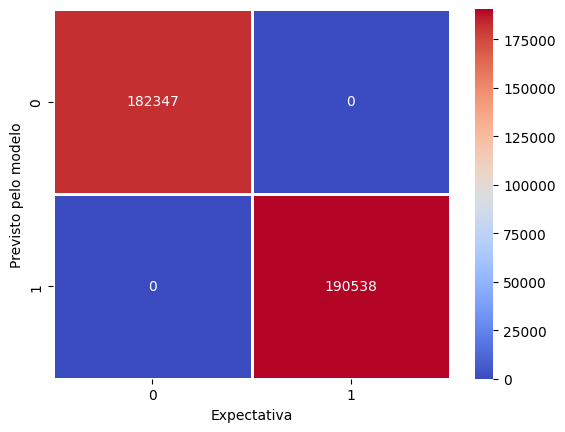

Acurácia: 100.000000%
Precisão: 100.000000%
Recall:  100.000000%
F1 Score:  100.000000%
MCC:  1.0

MÉTRICAS TESTE
 
SMOTE 5050



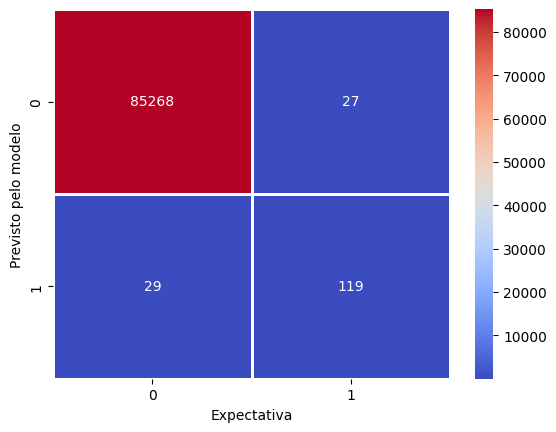

Acurácia: 99.934459%
Precisão: 81.506849%
Recall:  80.405405%
F1 Score:  80.952381%
MCC:  0.8092143449446779

MÉTRICA AUC ROC

Treinamento:  1.0 
Teste: 0.9018687528022776


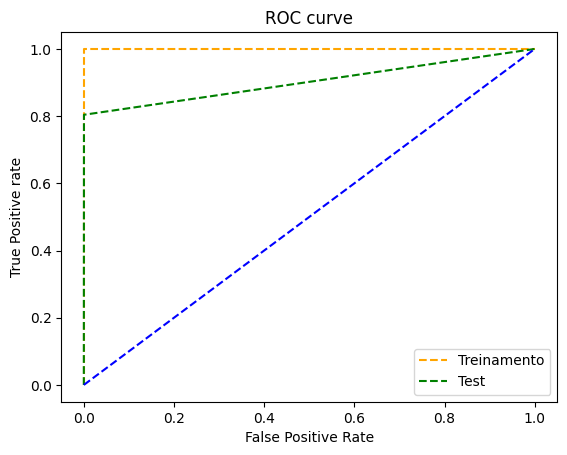

In [ ]:
cf_matrix = confusion_matrix(y_train_sm_5050, y_pred_rl)
sn.heatmap(cf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Expectativa')
plt.ylabel('Previsto pelo modelo')
print("\nMÉTRICAS TREINAMENTO\n \nSMOTE 5050\n")
plt.show()
print(f'Acurácia: {accuracy_score(y_train_sm_5050, y_pred_rl):%}')
print(f'Precisão: {precision_score(y_train_sm_5050, y_pred_rl):%}')
print(f'Recall:  {recall_score(y_train_sm_5050, y_pred_rl):%}')
print(f'F1 Score:  {f1_score(y_train_sm_5050, y_pred_rl):%}')
print(f'MCC:  {matthews_corrcoef(y_train_sm_5050, y_pred_rl)}')
cf_matrix = confusion_matrix(y_test, resultado_rl)
sn.heatmap(cf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Expectativa')
plt.ylabel('Previsto pelo modelo')
print("\nMÉTRICAS TESTE\n \nSMOTE 5050\n")
plt.show()
print(f'Acurácia: {accuracy_score(y_test, resultado_rl):%}')
print(f'Precisão: {precision_score(y_test, resultado_rl):%}')
print(f'Recall:  {recall_score(y_test, resultado_rl):%}')
print(f'F1 Score:  {f1_score(y_test, resultado_rl):%}')
print(f'MCC:  {matthews_corrcoef(y_test, resultado_rl)}')


print("\nMÉTRICA AUC ROC\n")
fpr1, tpr1, thresh1 = roc_curve(y_train_sm_5050, y_pred_rl, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, resultado_rl, pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

auc_score1 = roc_auc_score(y_train_sm_5050, y_pred_rl)
auc_score2 = roc_auc_score(y_test, resultado_rl)

print("Treinamento: ",auc_score1, "\nTeste:", auc_score2)

plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Treinamento')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Test')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC')
plt.show();

#####**MODELO 2**

In [8]:
model = cuRandomForestClassifier(n_estimators=10000, verbose=5)
model.fit(X_train_sm_5050, y_train_sm_5050)
y_pred_curl = model.predict(X_train_sm_5050)

print(classification_report(y_train_sm_5050, y_pred_curl))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    182347
           1       1.00      1.00      1.00    190538

    accuracy                           1.00    372885
   macro avg       1.00      1.00      1.00    372885
weighted avg       1.00      1.00      1.00    372885



In [9]:
print(X_test)
resultado_curl = model.predict(X_test)

            Time        V1        V2        V3        V4        V5        V6  \
186882  127294.0 -2.537331  1.890864 -0.840555 -1.102759 -2.105725  0.367811   
165754  117632.0 -0.250839  1.104108  0.206089  0.417324  1.204079 -0.350694   
235285  148330.0  0.568980 -2.520416 -1.114138  1.670652 -1.128945  0.398822   
101271   67778.0  1.328892  0.226908 -0.308968  0.381772  0.238490 -0.282946   
5832      6308.0  1.124863 -0.165691  1.337053  1.030033 -0.891116  0.202926   
...          ...       ...       ...       ...       ...       ...       ...   
64725    51279.0 -1.808185  1.328808 -0.991449 -2.473986  2.185095  3.496806   
16688    28048.0 -0.442905  0.716727  1.256775  0.860048  1.210872  1.066390   
183868  125990.0  2.092418 -0.931315 -1.553089 -1.131369 -0.197801 -0.373117   
45011    42168.0  1.293234  0.097565 -0.209304  0.329036  0.034958 -0.145507   
150527   93609.0  2.214016 -0.584030 -1.238673 -0.702993 -0.184492 -0.646248   

              V7        V8        V9  .


MÉTRICAS TREINAMENTO
 
SMOTE 1090



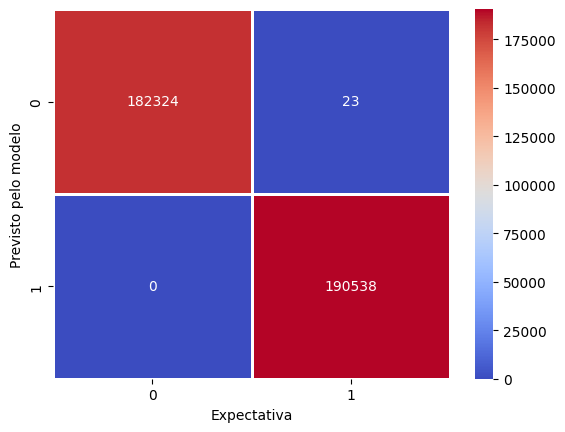

Acurácia: 99.993832%
Precisão: 99.987930%
Recall:  100.000000%
F1 Score:  99.993965%
MCC:  0.9998765852954309

MÉTRICAS TESTE
 
SMOTE 5050



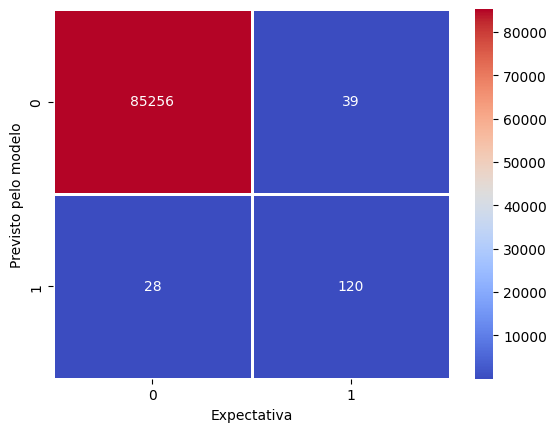

Acurácia: 99.921585%
Precisão: 75.471698%
Recall:  81.081081%
F1 Score:  78.175896%
MCC:  0.7818705468704396

MÉTRICA AUC ROC

Treinamento:  0.9999369334291214 
Teste: 0.9051767870807675


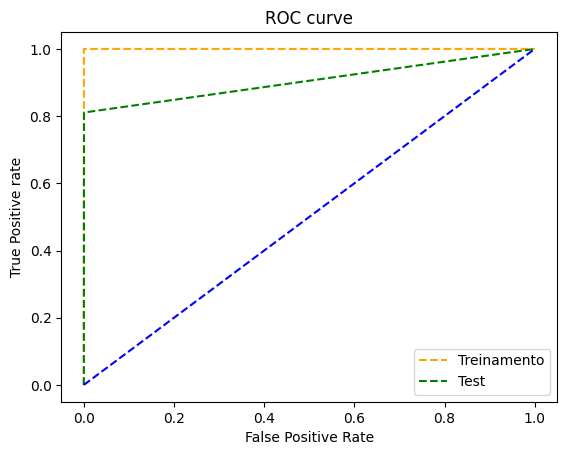

In [10]:
cf_matrix = confusion_matrix(y_train_sm_5050, y_pred_curl)
sn.heatmap(cf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Expectativa')
plt.ylabel('Previsto pelo modelo')
print("\nMÉTRICAS TREINAMENTO\n \nSMOTE 1090\n")
plt.show()
print(f'Acurácia: {accuracy_score(y_train_sm_5050, y_pred_curl):%}')
print(f'Precisão: {precision_score(y_train_sm_5050, y_pred_curl):%}')
print(f'Recall:  {recall_score(y_train_sm_5050, y_pred_curl):%}')
print(f'F1 Score:  {f1_score(y_train_sm_5050, y_pred_curl):%}')
print(f'MCC:  {matthews_corrcoef(y_train_sm_5050, y_pred_curl)}')
cf_matrix = confusion_matrix(y_test, resultado_curl)
sn.heatmap(cf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Expectativa')
plt.ylabel('Previsto pelo modelo')
print("\nMÉTRICAS TESTE\n \nSMOTE 5050\n")
plt.show()
print(f'Acurácia: {accuracy_score(y_test, resultado_curl):%}')
print(f'Precisão: {precision_score(y_test, resultado_curl):%}')
print(f'Recall:  {recall_score(y_test, resultado_curl):%}')
print(f'F1 Score:  {f1_score(y_test, resultado_curl):%}')
print(f'MCC:  {matthews_corrcoef(y_test, resultado_curl)}')


print("\nMÉTRICA AUC ROC\n")
fpr1, tpr1, thresh1 = roc_curve(y_train_sm_5050, y_pred_curl, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, resultado_curl, pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

auc_score1 = roc_auc_score(y_train_sm_5050, y_pred_curl)
auc_score2 = roc_auc_score(y_test, resultado_curl)

print("Treinamento: ",auc_score1, "\nTeste:", auc_score2)

plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Treinamento')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Test')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC')
plt.show();